# SIGNATE Cup
- **ÁõÆÁöÑ**Ôºö ÊóÖË°å‰ºöÁ§æ„ÅÆ‰øùÊúâ„Åô„ÇãÈ°ßÂÆ¢„Éá„Éº„ÇøÔºàÂ±ûÊÄß„ÇÑÂøóÂêë„ÄÅÂñ∂Ê•≠ÊãÖÂΩì„Å®„ÅÆÊé•Ëß¶Â±•Ê≠¥Á≠âÔºâ„ÇíÂÖÉ„Å´„ÄÅÊóÖË°å„Éë„ÉÉ„Ç±„Éº„Ç∏„ÅÆÊàêÁ¥ÑÁéá„Çí‰∫àÊ∏¨„Åô„Çã
- **Ë©ï‰æ°ÊåáÊ®ô**ÔºöAUC
- **ÁõÆÁöÑÂ§âÊï∞**Ôºö‰∫àÊ∏¨Á¢∫Áéá
- ÂÇôËÄÉÔºö „Éá„Éº„Çø„Å´ÊÑèÂõ≥ÁöÑ„Å´„Éé„Ç§„Ç∫„ÇÑË°®Ë®òÊè∫„Çå„Çí‰ªò‰∏é

# „É°„É¢
- Âà•„Éï„Ç°„Ç§„É´„Å´Ë®òËºâ
- **LightGBM„Å´Âà©Áî®„Åô„ÇãÁâπÂæ¥Èáè„ÅÆÊï∞„ÇíÊ∏õ„Çâ„Åô**

# „É≠„Ç∞
- **df_train**ÔºöÂä†Â∑•„Åó„ÅüË®ìÁ∑¥„Éá„Éº„Çø
- **df_train_original**ÔºöÁÑ°Âä†Â∑•„ÅÆË®ìÁ∑¥„Éá„Éº„Çø

In [ ]:
# „É©„Ç§„Éñ„É©„É™„ÅÆË™≠„ÅøËæº„Åø
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Google Colaboratory„Åß‰ΩúÊ•≠„Åô„ÇãÂ†¥Âêà„ÅØ„Åì„Å°„Çâ„ÇÇÂÆüË°å„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
from google.colab import drive
drive.mount('/content/drive')
# %cd ‰ª•Èôç„Å´„Åì„ÅÆnotebook„ÇíÁΩÆ„ÅÑ„Å¶„ÅÑ„Çã„Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíÊåáÂÆö„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
%cd "/content/drive/MyDrive"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
# INPUT_DIR„Å´train.csv„Å™„Å©„ÅÆ„Éá„Éº„Çø„ÇíÁΩÆ„ÅÑ„Å¶„ÅÑ„Çã„Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíÊåáÂÆö„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
INPUT_DIR = "./Colab Notebooks/SIGNATE/SIGNATE CUP_2408/"

df_train = pd.read_csv(INPUT_DIR + "train.csv")
df_test = pd.read_csv(INPUT_DIR + "test.csv")
sample_sub = pd.read_csv(INPUT_DIR + "sample_submit.csv", header=None)

In [ ]:
df_train.head()

id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0   0   50Ê≠≥     Self Enquiry         2            900Áßí  Large Business   
1   1   56Ê≠≥  Company Invited         1             14ÂàÜ        Salaried   
2   2   NaN     Self Enquiry         1             10ÂàÜ  Large Business   
3   3  ‰∏âÂçÅ‰∏ÉÊ≠≥     Self Enquiry         2           1080Áßí  Small Business   
4   4   48Ê≠≥  Company Invited         3           1020Áßí  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1                       4   
1                    3.0             2         1                       4   
2                    3.0             4         0                       4   
3                    4.0             1         0                       5   
4                    4.0             4         0                       4   

      Designation MonthlyIncome     customer_info  ProdTaken  
0       Executive      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
1  Senior Manager      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0  
2       Executive      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1  
3  Senior Manager      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0  
4       Executive      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1

In [ ]:
df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [ ]:
df_train_original["ProdTaken"].value_counts()

ProdTaken
0    2992
1     497
Name: count, dtype: int64

In [ ]:
# Ë®ìÁ∑¥„Éá„Éº„Çø
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   object 
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [ ]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3396 non-null   object 
 2   TypeofContact           3477 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3358 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3465 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3447 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [ ]:
# Ë®ìÁ∑¥„Éá„Éº„Çø
df_train_original.isnull().sum()

id                          0
Age                       100
TypeofContact               6
CityTier                    0
DurationOfPitch           121
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          33
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              22
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              56
customer_info               0
ProdTaken                   0
dtype: int64

In [ ]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø
df_test_original.isnull().sum()

id                          0
Age                        93
TypeofContact              12
CityTier                    0
DurationOfPitch           131
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          24
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              42
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              49
customer_info               0
dtype: int64

# ÂâçÂá¶ÁêÜ

## **Age**

In [ ]:
def get_unique_elements_in_column(df, column):
    unique_elements = df[column].unique()
    return unique_elements

column = "Age"
unique_age_data = get_unique_elements_in_column(df_train, column)
print(unique_age_data)

['50Ê≠≥' '56Ê≠≥' nan '‰∏âÂçÅ‰∏ÉÊ≠≥' '48Ê≠≥' '19Ê≠≥' '47Ê≠≥' '49Ê≠≥' '33Ê≠≥' 'ÔºìÔºëÊ≠≥' '51Ê≠≥' '46Ê≠≥'
 'ÔºîÔºôÊ≠≥' '53Êâç' '20Ê≠≥' '25Ê≠≥' '‰∫îÂçÅ‰∏âÊ≠≥' '20‰ª£' '44Ê≠≥' '30Ê≠≥' '34Ê≠≥' '29Ê≠≥' '30‰ª£' '41Ê≠≥'
 '50‰ª£' '52Ê≠≥' '22Ê≠≥' 'ÔºìÔºñÊ≠≥' '28Ê≠≥' '25Êâç' '‰∫îÂçÅ‰∏ÄÊ≠≥' '48Êâç' '38Êâç' '‰∏âÂçÅ‰∏âÊ≠≥' '42Èöõ' 'ÔºïÔºê‰ª£'
 '35Êâç' '59Ê≠≥' 'ÂõõÂçÅ‰∏âÊ≠≥' '32Ê≠≥' 'ÔºîÔºíÊâç' '53Ê≠≥' '58Ê≠≥' '40‰ª£' '‰∫åÂçÅÂÖ≠Ê≠≥' '52Èöõ' '54Ê≠≥' '59Êâç'
 '29Êâç' '21Êâç' '57Ê≠≥' '37Ê≠≥' '35Ê≠≥' '36Êâç' '38Ê≠≥' 'ÔºìÔºóÊ≠≥' '50Êâç' '51Êâç' '43Ê≠≥' 'ÂõõÂçÅÊ≠≥'
 '26Ê≠≥' '31Ê≠≥' '27Ê≠≥' '40Ê≠≥' 'ÔºìÔºîÊ≠≥' '40Èöõ' '21Ê≠≥' '24Êâç' '45Ê≠≥' '36Ê≠≥' '41Êâç' '38Èöõ'
 '18Ê≠≥' '39Ê≠≥' 'ÔºîÔºñÊ≠≥' 'ÔºîÔºê‰ª£' 'ÔºïÔºïÊ≠≥' '58Èöõ' '24Ê≠≥' '41Èöõ' '‰∏âÂçÅ‰∏ÄÊ≠≥' '52Êâç' 'ÔºìÔºê‰ª£' '28Êâç'
 '55Èöõ' '60‰ª£' '27Èöõ' 'ÔºìÔºíÊ≠≥' '60Ê≠≥' '‰∫îÂçÅÂõõÊ≠≥' '29Èöõ' '‰∏âÂçÅÂõõÊ≠≥' 'ÔºîÔºóÊ≠≥' '37Èöõ' '‰∫åÂçÅÂõõÊ≠≥'
 'ÂõõÂçÅ‰∏ÉÊ≠≥' '58Êâç' '39Êâç' '23Êâç' 'ÔºìÔºìÊ≠≥' 'ÔºîÔºíÊ≠≥' 'ÔºîÔºïÊ≠≥' 'ÔºìÔºôÊ≠≥' 'ÔºïÔºîÊ≠≥' '55Ê≠≥' '4

In [ ]:
import re

def extract_age(text):
    if pd.isna(text):
        return text  # Ê¨†ÊêçÂÄ§„Åå„ÅÇ„ÇãÂ†¥Âêà„ÄÅ„Åù„ÅÆ„Åæ„ÅæËøî„Åô

    # Âπ¥ÈΩ¢„ÇíË°®„Åô„ÉÜ„Ç≠„Çπ„Éà„Åã„ÇâÊï∞ÂÄ§„ÇíÊäΩÂá∫„Åô„ÇãÊ≠£Ë¶èË°®Áèæ„Éë„Çø„Éº„É≥
    pattern = r'\d+'

    # Êº¢Êï∞Â≠ó„Å®ÂØæÂøú„Åô„Çã„Ç¢„É©„Éì„Ç¢Êï∞Â≠ó„ÅÆËæûÊõ∏
    kanji_to_arabic = {
        '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5,
        'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10
    }

    text_string = str(text)

    # „ÉÜ„Ç≠„Çπ„Éà„Åã„ÇâÊï∞ÂÄ§„ÇíÊäΩÂá∫
    match = re.search(pattern, text_string)
    if match:
        # Êï∞ÂÄ§„Åå„Ç¢„É©„Éì„Ç¢Êï∞Â≠ó„Åß„ÅÇ„ÇãÂ†¥Âêà
        return int(match.group())
    else:
        # Êï∞ÂÄ§„ÅåÊº¢Êï∞Â≠ó„Åß„ÅÇ„ÇãÂ†¥Âêà
        numeric_age = 0
        multiplier = 1  # „ÄåÂçÅ„Äç„ÅÆ‰πóÊï∞Ôºà10„ÅÆ‰ΩçÔºâ
        chars = list(text_string)  # „ÉÜ„Ç≠„Çπ„Éà„Çí1ÊñáÂ≠ó„Åö„Å§„É™„Çπ„Éà„Å´Â§âÊèõ
        i = len(chars) - 1  # „ÉÜ„Ç≠„Çπ„Éà„ÇíÂæå„Çç„Åã„ÇâÂá¶ÁêÜ

        while i >= 0:
            char = chars[i]
            if char in kanji_to_arabic:
                if char == 'ÂçÅ':
                    # „ÄåÂçÅ„Äç„ÅÆÂá¶ÁêÜ
                    if multiplier == 1:
                        multiplier = 10
                    else:
                        numeric_age += multiplier
                        multiplier = 10
                else:
                    # „ÄåÂçÅ„Äç‰ª•Â§ñ„ÅÆÊº¢Êï∞Â≠ó„ÅÆÂ†¥Âêà
                    numeric_age += kanji_to_arabic[char] * multiplier
                    multiplier = 1
            i -= 1

        # „ÄåÂçÅ„Äç„ÅåÊúÄÂæå„Å´Êù•„ÅüÂ†¥Âêà„ÅÆÂá¶ÁêÜ
        if multiplier == 10:
            numeric_age += 10

        return numeric_age


# Êï∞ÂÄ§„Éá„Éº„Çø„Å´Â§âÊèõ„Åó„ÅüÂπ¥ÈΩ¢„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
numeric_age_data = []

# ÂêÑË¶ÅÁ¥†„ÇíÊï∞ÂÄ§„Éá„Éº„Çø„Å´Â§âÊèõ
for age_text in unique_age_data:
    if age_text:
        numeric_age = extract_age(age_text)
        numeric_age_data.append(numeric_age)
    else:
        numeric_age_data.append(None)

combined_age_data = list(zip(unique_age_data, numeric_age_data))
compared_age_data = sorted(combined_age_data, key=lambda x: x[1])
df_compared_age = pd.DataFrame(compared_age_data, columns=["text", "numeric"])
# ÊØîËºÉÁµêÊûú‚Üì
# https://docs.google.com/spreadsheets/d/1HML1UZ0cwWt4lix8EliaazquNTDPFurJSxKAi8zrGlA/edit?gid=0#gid=0

In [ ]:
# Êú¨Áï™„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„ÇÇÂ§âÊèõÂá¶ÁêÜ„ÇíË°å„ÅÜ
df_train["Age"] = df_train["Age"].apply(extract_age)
df_test["Age"] = df_test["Age"].apply(extract_age)
df_train.head()

id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0   0  50.0     Self Enquiry         2            900Áßí  Large Business   
1   1  56.0  Company Invited         1             14ÂàÜ        Salaried   
2   2   NaN     Self Enquiry         1             10ÂàÜ  Large Business   
3   3  37.0     Self Enquiry         2           1080Áßí  Small Business   
4   4  48.0  Company Invited         3           1020Áßí  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1                       4   
1                    3.0             2         1                       4   
2                    3.0             4         0                       4   
3                    4.0             1         0                       5   
4                    4.0             4         0                       4   

      Designation MonthlyIncome     customer_info  ProdTaken  
0       Executive      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
1  Senior Manager      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0  
2       Executive      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1  
3  Senior Manager      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0  
4       Executive      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1

## **CityTier**

In [ ]:
print(df_train["CityTier"].unique())

[2 1 3]


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   float64
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

## **DurationOfPitchÔºàÊãÖÂΩìËÄÖ„ÅÆÂ£≤„ÇäËæº„ÅøÊôÇÈñìÔºâ**

In [ ]:
print(df_train["DurationOfPitch"].unique())

['900Áßí' '14ÂàÜ' '10ÂàÜ' '1080Áßí' '1020Áßí' '16ÂàÜ' '840Áßí' '22ÂàÜ' '20ÂàÜ' '11ÂàÜ' '32ÂàÜ'
 '17ÂàÜ' '24ÂàÜ' '1380Áßí' '35ÂàÜ' '420Áßí' '5ÂàÜ' '480Áßí' '8ÂàÜ' '15ÂàÜ' '960Áßí' nan '540Áßí'
 '26ÂàÜ' '13ÂàÜ' '12ÂàÜ' '21ÂàÜ' '25ÂàÜ' '720Áßí' '9ÂàÜ' '7ÂàÜ' '780Áßí' '6ÂàÜ' '18ÂàÜ' '31ÂàÜ'
 '600Áßí' '23ÂàÜ' '28ÂàÜ' '2160Áßí' '660Áßí' '1500Áßí' '1920Áßí' '27ÂàÜ' '33ÂàÜ' '360Áßí'
 '1320Áßí' '1740Áßí' '1680Áßí' '29ÂàÜ' '1620Áßí' '1440Áßí' '1800Áßí' '30ÂàÜ' '34ÂàÜ' '4ÂàÜ'
 '19ÂàÜ' '1860Áßí' '1260Áßí' '2100Áßí' '300Áßí' '2040Áßí' '1200Áßí' '1560Áßí' '1980Áßí'
 '36ÂàÜ' '1140Áßí']


In [ ]:
print(df_test["DurationOfPitch"].unique())

['13ÂàÜ' '12ÂàÜ' '540Áßí' '420Áßí' '7ÂàÜ' nan '8ÂàÜ' '16ÂàÜ' '22ÂàÜ' '24ÂàÜ' '17ÂàÜ' '11ÂàÜ'
 '23ÂàÜ' '10ÂàÜ' '15ÂàÜ' '960Áßí' '9ÂàÜ' '18ÂàÜ' '900Áßí' '840Áßí' '660Áßí' '19ÂàÜ' '14ÂàÜ'
 '1020Áßí' '31ÂàÜ' '1080Áßí' '300Áßí' '720Áßí' '33ÂàÜ' '480Áßí' '6ÂàÜ' '28ÂàÜ' '1980Áßí' '27ÂàÜ'
 '600Áßí' '360Áßí' '20ÂàÜ' '26ÂàÜ' '21ÂàÜ' '780Áßí' '1740Áßí' '34ÂàÜ' '1320Áßí' '1560Áßí'
 '32ÂàÜ' '1800Áßí' '1920Áßí' '29ÂàÜ' '1380Áßí' '35ÂàÜ' '1260Áßí' '30ÂàÜ' '1860Áßí' '2040Áßí'
 '25ÂàÜ' '240Áßí' '1620Áßí' '5ÂàÜ' '1200Áßí' '1500Áßí' '36ÂàÜ' '1440Áßí' '2100Áßí' '1680Áßí'
 '1140Áßí' '2160Áßí']


In [ ]:
# „Éá„Éº„Çø
unique_pitch = df_train["DurationOfPitch"].unique()

# „ÉÜ„Ç≠„Çπ„Éà„Éá„Éº„Çø„Åã„ÇâÊï∞Â≠ó„ÅÆÈÉ®ÂàÜ„Å†„Åë„ÇíÊäΩÂá∫„Åó„Å¶Êï∞ÂÄ§„Éá„Éº„Çø„Å´Â§âÊèõ
numeric_pitch = []
for item in unique_pitch:
    if pd.notna(item):
        if 'Áßí' in item:
            seconds = int(item.replace('Áßí', ''))
            minutes = int(seconds / 60)
            numeric_pitch.append(minutes)
        elif 'ÂàÜ' in item:
            minutes = int(item.replace('ÂàÜ', ''))
            numeric_pitch.append(minutes)
    else:
        numeric_pitch.append(pd.NA)

# ÁµêÊûú„ÇíÂá∫Âäõ
compared_pitch_data = list(zip(unique_pitch, numeric_pitch))
df_compared_pitch = pd.DataFrame(compared_pitch_data, columns=["text", "numeric"])
df_compared_pitch.head()

text numeric
0   900Áßí      15
1    14ÂàÜ      14
2    10ÂàÜ      10
3  1080Áßí      18
4  1020Áßí      17

In [ ]:
# Èñ¢Êï∞„Å®„Åó„Å¶ÂÆöÁæ©
def convert_to_numeric_pitch(item):
    if pd.notna(item):
        if 'Áßí' in item:
            seconds = int(item.replace('Áßí', ''))
            minutes = int(seconds / 60)
            return minutes
        elif 'ÂàÜ' in item:
            minutes = int(item.replace('ÂàÜ', ''))
            return minutes

# Êú¨Áï™„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„ÇÇÂ§âÊèõÂá¶ÁêÜ„ÇíË°å„ÅÜ
df_train["DurationOfPitch"] = df_train["DurationOfPitch"].apply(convert_to_numeric_pitch)
df_test["DurationOfPitch"] = df_test["DurationOfPitch"].apply(convert_to_numeric_pitch)
df_train.head()

id   Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
0   0  50.0     Self Enquiry         2             15.0  Large Business   
1   1  56.0  Company Invited         1             14.0        Salaried   
2   2   NaN     Self Enquiry         1             10.0  Large Business   
3   3  37.0     Self Enquiry         2             18.0  Small Business   
4   4  48.0  Company Invited         3             17.0  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1                       4   
1                    3.0             2         1                       4   
2                    3.0             4         0                       4   
3                    4.0             1         0                       5   
4                    4.0             4         0                       4   

      Designation MonthlyIncome     customer_info  ProdTaken  
0       Executive      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
1  Senior Manager      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0  
2       Executive      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1  
3  Senior Manager      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0  
4       Executive      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1

## **Gender**  
‚ÄªÁî∑ÊÄßÔºöÔºë / Â•≥ÊÄßÔºöÔºê„Å®„Å™„Çã„Çà„ÅÜ„Å´Â§âÊèõ

In [ ]:
print(df_train["Gender"].unique())

['male' 'Male' 'Female' 'female' 'ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ' 'FEMALE' 'Ôº≠ÔΩÅÔΩåÔΩÖ' 'Fe Male' 'MALE'
 'ÔΩÜÔΩÖ\u3000ÔΩçÔΩÅÔΩåÔΩÖ' 'fe male' 'Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ' 'ÔΩçÔΩÅÔΩåÔΩÖ' 'FE MALE' 'Ôº¶ÔΩÖ\u3000Ôº≠ÔΩÅÔΩåÔΩÖ'
 'Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•' 'Ôº¶Ôº•\u3000Ôº≠Ôº°Ôº¨Ôº•' 'Ôº≠Ôº°Ôº¨Ôº•']


In [ ]:
import unicodedata

def normalize_gender(gender):
    # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ„Åô„Çã
    normalized = unicodedata.normalize('NFKC', gender).lower().strip()

    # "female" „Å® "fe male" „Çí 0„ÄÅ"male" „Çí 1 „Å´Áµ±‰∏Ä
    if "male" in normalized.replace(" ", ""):
        if "fe" in normalized.replace(" ", ""):
            return 0
        else:
            return 1
    return None  # „Åù„Çå‰ª•Â§ñ„ÅÆÂ†¥Âêà„ÅØ None „Å™„Å©„ÅÆÈÅ©Âàá„Å™ÂÄ§„ÇíËøî„Åô

gender_data = df_train["Gender"].unique()

# Ê≠£Ë¶èÂåñ„Åó„Åü„Éá„Éº„Çø„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
normalized_gender_data = []

for gender in gender_data:
    normalized_gender = normalize_gender(gender)
    normalized_gender_data.append(normalized_gender)

compared_gender_data = list(zip(normalized_gender_data, gender_data))
df_compared_gender = pd.DataFrame(compared_gender_data, columns=["text", "numeric"])
df_compared_gender

text  numeric
0      1     male
1      1     Male
2      0   Female
3      0   female
4      0   ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ
5      0   FEMALE
6      1     Ôº≠ÔΩÅÔΩåÔΩÖ
7      0  Fe Male
8      1     MALE
9      0  ÔΩÜÔΩÖ„ÄÄÔΩçÔΩÅÔΩåÔΩÖ
10     0  fe male
11     0   Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ
12     1     ÔΩçÔΩÅÔΩåÔΩÖ
13     0  FE MALE
14     0  Ôº¶ÔΩÖ„ÄÄÔº≠ÔΩÅÔΩåÔΩÖ
15     0   Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•
16     0  Ôº¶Ôº•„ÄÄÔº≠Ôº°Ôº¨Ôº•
17     1     Ôº≠Ôº°Ôº¨Ôº•

In [ ]:
# Êú¨Áï™„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„ÇÇÂ§âÊèõÂá¶ÁêÜ„ÇíË°å„ÅÜ
df_train["Gender"] = df_train["Gender"].apply(normalize_gender)
df_test["Gender"] = df_test["Gender"].apply(normalize_gender)
df_train.head()

id   Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
0   0  50.0     Self Enquiry         2             15.0  Large Business   
1   1  56.0  Company Invited         1             14.0        Salaried   
2   2   NaN     Self Enquiry         1             10.0  Large Business   
3   3  37.0     Self Enquiry         2             18.0  Small Business   
4   4  48.0  Company Invited         3             17.0  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0       1                     1.0                4.0          Basic   
1       1                     1.0                4.0       Standard   
2       0                     1.0                3.0          Basic   
3       0                     1.0                3.0       Standard   
4       0                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1                       4   
1                    3.0             2         1                       4   
2                    3.0             4         0                       4   
3                    4.0             1         0                       5   
4                    4.0             4         0                       4   

      Designation MonthlyIncome     customer_info  ProdTaken  
0       Executive      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
1  Senior Manager      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0  
2       Executive      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1  
3  Senior Manager      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0  
4       Executive      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1

## **DesignationÔºàÈ°ßÂÆ¢„ÅÆÊåáÂÆöÔºüÔºüÔºâ**

In [ ]:
print(df_train["Designation"].unique())

['Executive' 'Senior Manager' 'AVP' 'Manager' 'Senior Manageùôß' 'ExecuÔΩîive'
 'Œúanager' 'VP' 'S–µnior Manager' 'ŒëVP' '–êVP' 'E√óecutive' 'MŒ±nageùôß'
 'Executi—µ–µ' '–Öenior Manager' 'Manag–µr' '–ïxecutiv–µ' 'Senior ŒúanŒ±ger'
 '–ïxecuÔΩîive' 'Ex–µcutiv–µ' 'Ex–µcutive' 'Senior Manag–µùôß' 'Manageùôß'
 'Senioùôß Manager' 'ManŒ±ger' 'Œúanageùôß' 'ManŒ±g–µr' 'Senior Manag–µr'
 'Executiv–µ' 'Executi—µe' '–ï√ó–µcutive' '–ïxecutive' 'VÔº∞' '’èenior Œúanager'
 'Ex–µcuti—µ–µ' 'Senior ManŒ±ger' 'MŒ±nager' 'Senior MŒ±nŒ±ger' 'E√ó–µcuti—µe'
 '–Öenior ManŒ±ger' 'Ex–µcÔΩïtive' 'ExecÔΩïtive' 'MŒ±nŒ±ger' 'Œúanag–µr' 'E√óecÔΩïtive'
 'S–µnior Manag–µr' '’èenior Manager' 'AVÔº∞' 'Ex–µcÔΩïtiv–µ' 'MŒ±nag–µr' '–ïx–µcutiv–µ'
 'Senior MŒ±nager' '–ï√óecutive']


In [ ]:
# Ë°®Ë®òÊè∫„Çå„Åå„ÅÇ„Çã„Éá„Éº„Çø„Å´„Å§„ÅÑ„Å¶„ÄÅ„Åù„ÅÆ‰∏≠„Å´Âê´„Åæ„Çå„ÇãÔºë„Å§„ÅÆÊñáÂ≠ó„Çí„Éô„Éº„Çπ„Å´„Ç∞„É´„Éº„Éî„É≥„Ç∞
def convert_by_rules(data):
    converted_designation_data = []
    for item in data:
        # Ë¶èÂâá„Å´Âü∫„Å•„ÅÑ„Å¶Â§âÊèõ
        if 'c' in item.lower():
            converted_designation_data.append('Executive')
        elif 'v' in item.lower():
            if len(item) == 2:
              converted_designation_data.append('VP')
            else:
              converted_designation_data.append('AVP')
        elif 'o' in item.lower():
            converted_designation_data.append('Senior Manager')
        else:
            converted_designation_data.append('Manager')
    return converted_designation_data

designation_data = df_train["Designation"].unique()
converted_designation_data = convert_by_rules(designation_data)
compared_designation_data = list(zip(converted_designation_data, designation_data))
df_compared_designation = pd.DataFrame(compared_designation_data, columns=["after", "before"])
df_compared_designation # Â§âÊèõÂâç„Å®Â§âÊèõÂæå„ÇíÊØîËºÉ

after          before
0        Executive       Executive
1   Senior Manager  Senior Manager
2              AVP             AVP
3          Manager         Manager
4   Senior Manager  Senior Manageùôß
5        Executive       ExecuÔΩîive
6          Manager         Œúanager
7               VP              VP
8   Senior Manager  S–µnior Manager
9              AVP             ŒëVP
10             AVP             –êVP
11       Executive       E√óecutive
12         Manager         MŒ±nageùôß
13       Executive       Executi—µ–µ
14  Senior Manager  –Öenior Manager
15         Manager         Manag–µr
16       Executive       –ïxecutiv–µ
17  Senior Manager  Senior ŒúanŒ±ger
18       Executive       –ïxecuÔΩîive
19       Executive       Ex–µcutiv–µ
20       Executive       Ex–µcutive
21  Senior Manager  Senior Manag–µùôß
22         Manager         Manageùôß
23  Senior Manager  Senioùôß Manager
24         Manager         ManŒ±ger
25         Manager         Œúanageùôß
26         Manager         ManŒ±g–µr
27  Senior Manager  Senior Manag–µr
28       Executive       Executiv–µ
29       Executive       Executi—µe
30       Executive       –ï√ó–µcutive
31       Executive       –ïxecutive
32              VP              VÔº∞
33  Senior Manager  ’èenior Œúanager
34       Executive       Ex–µcuti—µ–µ
35  Senior Manager  Senior ManŒ±ger
36         Manager         MŒ±nager
37  Senior Manager  Senior MŒ±nŒ±ger
38       Executive       E√ó–µcuti—µe
39  Senior Manager  –Öenior ManŒ±ger
40       Executive       Ex–µcÔΩïtive
41       Executive       ExecÔΩïtive
42         Manager         MŒ±nŒ±ger
43         Manager         Œúanag–µr
44       Executive       E√óecÔΩïtive
45  Senior Manager  S–µnior Manag–µr
46  Senior Manager  ’èenior Manager
47             AVP             AVÔº∞
48       Executive       Ex–µcÔΩïtiv–µ
49         Manager         MŒ±nag–µr
50       Executive       –ïx–µcutiv–µ
51  Senior Manager  Senior MŒ±nager
52       Executive       –ï√óecutive

In [ ]:
# Êú¨Áï™„Éá„Éº„Çø„Å´ÈÅ©Áî®
df_train['Converted Designation'] = convert_by_rules(df_train['Designation'])
df_train.drop(columns=['Designation'], inplace=True)
df_test['Converted Designation'] = convert_by_rules(df_test['Designation'])
df_test.drop(columns=['Designation'], inplace=True)
df_train.head()

id   Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
0   0  50.0     Self Enquiry         2             15.0  Large Business   
1   1  56.0  Company Invited         1             14.0        Salaried   
2   2   NaN     Self Enquiry         1             10.0  Large Business   
3   3  37.0     Self Enquiry         2             18.0  Small Business   
4   4  48.0  Company Invited         3             17.0  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0       1                     1.0                4.0          Basic   
1       1                     1.0                4.0       Standard   
2       0                     1.0                3.0          Basic   
3       0                     1.0                3.0       Standard   
4       0                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1                       4   
1                    3.0             2         1                       4   
2                    3.0             4         0                       4   
3                    4.0             1         0                       5   
4                    4.0             4         0                       4   

  MonthlyIncome     customer_info  ProdTaken Converted Designation  
0      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1             Executive  
1      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0        Senior Manager  
2      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1             Executive  
3      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0        Senior Manager  
4      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1             Executive

In [ ]:
# "Designation"„Å´„Å§„ÅÑ„Å¶„ÉÄ„Éü„ÉºÂ§âÊï∞Âåñ
df_train_dummies_01 = pd.get_dummies(df_train, columns=['Converted Designation'], drop_first = True, dtype=int)
df_test_dummies_01 = pd.get_dummies(df_test, columns=['Converted Designation'], drop_first = True, dtype=int)

In [ ]:
df_train_dummies_01

id   Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
0        0  50.0     Self Enquiry         2             15.0  Large Business   
1        1  56.0  Company Invited         1             14.0        Salaried   
2        2   NaN     Self Enquiry         1             10.0  Large Business   
3        3  37.0     Self Enquiry         2             18.0  Small Business   
4        4  48.0  Company Invited         3             17.0  Small Business   
...    ...   ...              ...       ...              ...             ...   
3484  3484  40.0     Self Enquiry         2             26.0        Salaried   
3485  3485  40.0     Self Enquiry         1              9.0  Large Business   
3486  3486  31.0     Self Enquiry         1             14.0  Small Business   
3487  3487  56.0  Company Invited         2             15.0        Salaried   
3488  3488  42.0     Self Enquiry         1              9.0  Small Business   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  ...  \
0          1                     1.0                4.0          Basic  ...   
1          1                     1.0                4.0       Standard  ...   
2          0                     1.0                3.0          Basic  ...   
3          0                     1.0                3.0       Standard  ...   
4          0                     1.0                3.0          Basic  ...   
...      ...                     ...                ...            ...  ...   
3484       1                     2.0                3.0          Basic  ...   
3485       1                     3.0                3.0          Basic  ...   
3486       0                     3.0                2.0       Standard  ...   
3487       1                     3.0                6.0           King  ...   
3488       1                     3.0                1.0          Basic  ...   

      NumberOfTrips Passport  PitchSatisfactionScore  MonthlyIncome  \
0                 5        1                       4       253905.0   
1                 2        1                       4       404475.0   
2                 4        0                       4       278145.0   
3                 1        0                       5       326805.0   
4                 4        0                       4       258435.0   
...             ...      ...                     ...            ...   
3484              3        0                       1       258900.0   
3485              5        0                       3       260415.0   
3486              5        0                       4       317340.0   
3487              7        1                       4       527910.0   
3488              3        0                       1       278190.0   

         customer_info ProdTaken  Converted Designation_Executive  \
0         Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó         1                                1   
1        Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó         0                                0   
2     ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó         1                                1   
3        Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó         0                                0   
4            Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê         1                                1   
...                ...       ...                              ...   
3484   Èõ¢Â©öÊ∏à„Åø ‰πóÁî®ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó         1                                1   
3485     ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫         0                                1   
3486      Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºè„Åì„Å©„ÇÇ1‰∫∫         0                                0   
3487  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ2‰∫∫         1                                0   
3488    ÁµêÂ©öÊ∏à„Åø,ËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫         0                                1   

      Converted Designation_Manager  Converted Designation_Senior Manager  \
0                                 0                                     0   
1                   

## **TypeofContactÔºàÈ°ßÂÆ¢„ÅÆÈÄ£Áµ°ÊñπÊ≥ïÔºâ**

In [ ]:
print(df_train_dummies_01["TypeofContact"].unique())

['Self Enquiry' 'Company Invited' nan]


In [ ]:
print(df_train_dummies_01["TypeofContact"].value_counts())

TypeofContact
Self Enquiry       2194
Company Invited    1289
Name: count, dtype: int64


Ê¨†ÊêçÂÄ§„ÅÆ‰ª∂Êï∞„ÅØ6‰ª∂„Å™„ÅÆ„Åß„ÄÅÊï∞„ÅÆÂ§ö„ÅÑ"Self Enquiry"„ÅßÂüã„ÇÅ„Å¶„Åó„Åæ„ÅÜ

In [ ]:
# Ê¨†ÊêçÂÄ§„ÅÆË£úÂÆå
df_train_dummies_01['TypeofContact'].fillna('Self Enquiry', inplace=True)
df_test_dummies_01['TypeofContact'].fillna('Self Enquiry', inplace=True)
df_train_dummies_01["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       2200
Company Invited    1289
Name: count, dtype: int64

In [ ]:
df_test_dummies_01["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       2262
Company Invited    1227
Name: count, dtype: int64

In [ ]:
df_test_original["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       2250
Company Invited    1227
Name: count, dtype: int64

In [ ]:
# "TypeofContact"„Å´„Å§„ÅÑ„Å¶„ÉÄ„Éü„ÉºÂ§âÊï∞Âåñ
df_train = pd.get_dummies(df_train_dummies_01, columns=["TypeofContact"], drop_first = True, dtype=int)
df_test = pd.get_dummies(df_test_dummies_01, columns=["TypeofContact"], drop_first = True, dtype=int)

## **MonthlyIncomeÔºàÊúàÂèéÔºâ**

In [ ]:
df_test["MonthlyIncome"].unique()

array(['496950.0', 'ÊúàÂèé30.0‰∏áÂÜÜ', 'ÊúàÂèé26.0‰∏áÂÜÜ', ..., '349770.0', '272430.0',
       '411795.0'], dtype=object)

In [ ]:
# ÊñáÂ≠óÂàó„ÅÆÂá¶ÁêÜÈñ¢Êï∞„ÇíÂÆöÁæ©
def convert_to_yen(value):
    # ÂÄ§„ÅåÊñáÂ≠óÂàó„Åã„Å©„ÅÜ„Åã„ÇíÁ¢∫Ë™ç
    if isinstance(value, str):
        # Êï∞ÂÄ§„Éá„Éº„Çø„ÅØ„Åù„ÅÆ„Åæ„ÅæfloatÂûã„Å´Â§âÊèõ
        if value.replace('.', '', 1).isdigit():
            return float(value)

        # „ÄåÊúàÂèéXX‰∏áÂÜÜ„Äç„ÅÆÂΩ¢Âºè„ÅÆÂ†¥Âêà„ÄÅXX„ÇíÂèñ„ÇäÂá∫„Åó„Å¶10000„ÇíÊéõ„Åë„Çã
        elif 'ÊúàÂèé' in value and '‰∏áÂÜÜ' in value:
            value = value.replace('ÊúàÂèé', '').replace('‰∏áÂÜÜ', '')
            return float(value) * 10000

    # „Åô„Åß„Å´ float Âûã„ÅÆÂÄ§„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô
    elif isinstance(value, (float, int)):
        return value

    # „Åù„ÅÆ‰ªñ„ÅÆÂΩ¢Âºè„Åå„ÅÇ„ÇãÂ†¥Âêà„Å´„ÅØ NaN „ÇíËøî„Åô
    return pd.NA

# "MonthlyIncome" „Ç´„É©„É†„ÇíÊï∞ÂÄ§„Éá„Éº„Çø„Å´Â§âÊèõ
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].apply(convert_to_yen)


In [ ]:
df_train["MonthlyIncome"].unique()

array([253905., 404475., 278145., ..., 317340., 527910., 278190.])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3489 non-null   int64  
 1   Age                                   3389 non-null   float64
 2   CityTier                              3489 non-null   int64  
 3   DurationOfPitch                       3368 non-null   float64
 4   Occupation                            3489 non-null   object 
 5   Gender                                3489 non-null   int64  
 6   NumberOfPersonVisiting                3489 non-null   float64
 7   NumberOfFollowups                     3456 non-null   float64
 8   ProductPitched                        3489 non-null   object 
 9   PreferredPropertyStar                 3489 non-null   float64
 10  NumberOfTrips                         3467 non-null   object 
 11  Passport         

In [ ]:
df_test['MonthlyIncome'] = df_test['MonthlyIncome'].apply(convert_to_yen)

In [ ]:
df_test["MonthlyIncome"].unique()

array([496950., 300000., 260000., ..., 349770., 272430., 411795.])

## **Occupation**

In [ ]:
df_train["Occupation"].unique()

array(['Large Business', 'Salaried', 'Small Business'], dtype=object)

In [ ]:
df_test["Occupation"].unique()

array(['Small Business', 'Salaried', 'Large Business'], dtype=object)

In [ ]:
# „ÉÄ„Éü„ÉºÂ§âÊï∞Âåñ
df_train = pd.get_dummies(df_train, columns=["Occupation"], drop_first = True, dtype=int)
df_test = pd.get_dummies(df_test, columns=["Occupation"], drop_first = True, dtype=int)
df_train.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2             15.0       1                     1.0   
1   1  56.0         1             14.0       1                     1.0   
2   2   NaN         1             10.0       0                     1.0   
3   3  37.0         2             18.0       0                     1.0   
4   4  48.0         3             17.0       0                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar NumberOfTrips  ...  \
0                4.0          Basic                    3.0             5  ...   
1                4.0       Standard                    3.0             2  ...   
2                3.0          Basic                    3.0             4  ...   
3                3.0       Standard                    4.0             1  ...   
4                3.0          Basic                    4.0             4  ...   

   MonthlyIncome     customer_info  ProdTaken Converted Designation_Executive  \
0       253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1                               1   
1       404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0                               0   
2       278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1                               1   
3       326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0                               0   
4       258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1                               1   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

   Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                         0                           1                    0   
1                         0                           0                    1   
2                         0                           1                    0   
3                         0                           1                    0   
4                         0                           0                    0   

   Occupation_Small Business  
0                          0  
1                          0  
2                          0  
3                          1  
4                          1  

[5 rows x 22 columns]

In [ ]:
df_test.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  3489  48.0         2             13.0       1                     1.0   
1  3490  30.0         2             12.0       0                     1.0   
2  3491  25.0         1              9.0       0                     1.0   
3  3492  21.0         2              7.0       1                     1.0   
4  3493  41.0         1              7.0       1                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar NumberOfTrips  ...  \
0                4.0   Super De|uxe                    3.0             7  ...   
1                4.0       Standard                    3.0             4  ...   
2                4.0          Basic                    3.0             1  ...   
3                4.0          Basic                    4.0             1  ...   
4                4.0          Basic                    3.0             1  ...   

   PitchSatisfactionScore  MonthlyIncome     customer_info  \
0                       3       496950.0     ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó   
1                       3       300000.0    ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó   
2                       3       260000.0  Èõ¢Â©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ„Å™„Åó   
3                       3       259875.0   Èõ¢Â©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊâÄÊúâ„ÄÅÂ≠ê‰æõ„Å™„Åó   
4                       4       268830.0       Áã¨Ë∫´/ËªäÊâÄÊåÅÔºèÂ≠ê‰æõ„Å™„Åó   

  Converted Designation_Executive  Converted Designation_Manager  \
0                               0                              0   
1                               0                              0   
2                               1                              0   
3                               0                              0   
4                               1                              0   

   Converted Designation_Senior Manager  Converted Designation_VP  \
0                                     0                         0   
1                                     1                         0   
2                                     0                         0   
3                                     1                         0   
4                                     0                         0   

   TypeofContact_Self Enquiry  Occupation_Salaried  Occupation_Small Business  
0                           1                    0                          1  
1                           1                    0                          1  
2                           1                    1                          0  
3                           0                    1                          0  
4                           0                    1                          0  

[5 rows x 21 columns]

## **NumberOfPersonVisiting**

In [ ]:
df_train["NumberOfPersonVisiting"].unique()

array([1., 2., 3., 4.])

In [ ]:
df_test["NumberOfPersonVisiting"].unique()

array([1., 2., 3., 4.])

## **NumberOfFollowups**

In [ ]:
df_train["NumberOfFollowups"].unique()

array([  4.,   3.,   5.,   1.,   2., 100.,  nan, 500., 400.,   6., 300.,
       600.])

In [ ]:
df_test["NumberOfFollowups"].unique()

array([  4.,   3., 300.,   5., 400.,   1.,   2.,   6., 100.,  nan, 500.,
       200.])

In [ ]:
df_train["NumberOfFollowups"].value_counts()

NumberOfFollowups
4.0      1396
3.0      1279
5.0       519
2.0       108
1.0        77
6.0        38
300.0      17
400.0      15
500.0       5
100.0       1
600.0       1
Name: count, dtype: int64

## **ProductPitched**

In [ ]:
df_train["ProductPitched"].unique()

array(['Basic', 'Standard', 'Super Deluxe', 'basic', 'SUPER DELUXE',
       'super deluxe', 'BASIC', 'Deluxe', 'deluxe', 'STAN·óûARD',
       'STANDARD', '–íasic', 'DELUXE', 'Íì¢uper De|uxe', '–Öuper Deluxe',
       'BA’èIC', 'Basƒ±c', 'King', 'Super De|uxe', 'king', 'standard',
       'KING', 'BŒëSIC', 'Bùñ∫sic', 'De|uxe', '·é†ELUXE', 'Basiœ≤', 'de|u√óe',
       'Delu√óe', 'Standarùî°', 'Basiùò§', 'Œíasic', '’èuper Deluxe', 'Sta’∏dard',
       'BAÍì¢IC', '·óûeluxe', '’ètandard', 'Œíasƒ±ùò§', 'Kƒ±ng', 'BaÔΩìic', 'basƒ±c',
       'super de|uxe', 'Standùñ∫rd', 'Sùòµandard', 'êä°asic', 'Stùñ∫ndard',
       'Super ·óûeluxe', 'de|uxe', 'ÔΩìuper deluxe', 'STANDAR·é†', 'Basi—Å',
       'DŒïLUXŒï', 'Íì¢uper Deluxe', 'BASŒôC', 'Íì¢tandard', '–íùñ∫sic', 'Standaùò≥d',
       'basiœ≤', 'sta’∏dard', 'Super ·é†eluxe', 'DELUXŒï', '–Ötandard', 'êä°asiùò§',
       '·é†eluxe', 'Kƒ±’∏g', 'ùô≥eluxe', 'Ki’∏g', 'Œíasƒ±c', 'BASI–°',
       'SUPER DŒïLUXE', 'Bùñ∫siùò§', 'ŒíASI–°', 'Super ùô≥el

In [ ]:
df_test["ProductPitched"].unique()

array(['Super De|uxe', 'Standard', 'Basic', 'Deluxe', 'Super Deluxe',
       'DELUXE', 'King', 'standard', 'basic', 'BASIC', 'basƒ±c',
       'STANDARD', 'SUPER DELUXE', '–Ötandard', 'super deluxe', 'êä°asic',
       'SUPER ·é†ELUXE', 'SUPER ·óûELUXE', 'Œíasic', 'king', 'Basi—Å',
       'Íì¢tandard', 'Super ùô≥eluxe', '·óûeluxe', 'Basiùò§', 'Sta’∏dard',
       'deluxe', 'DELUXŒï', 'De|uxe', 'Basƒ±c', 'Delu√óe', 'basiœ≤', 'BaÔΩìic',
       '–íasic', 'Standùñ∫rd', 'KING', 'Bùñ∫siùò§', 'basi—Å', 'ùô≥eluxe', '·é†eluxe',
       'BASI–°', 'Super ·óûeluxe', 'STANDAR·é†', 'Stanùî°ard', 'STŒëNDARD',
       '·óûELUXE', 'BaÔΩìƒ±c', 'de|uxe', 'Super ·é†eluxe', 'Super Delu√óe',
       'Basƒ±œ≤', 'Íì¢uper Deluxe', 'SUPŒïR ·é†ELUXE', '·é†e|uxe', 'Bùñ∫sic',
       'Basiœ≤', 'stanùî°ard', 'BASŒôC', 'basiùò§', 'standùñ∫rd', 'Stùñ∫ndard',
       'Kƒ±ng', 'baÔΩìic', 'Basƒ±ùò§', 'BASŒô–°', 'Sùòµùñ∫ndaùò≥d', 'ki’∏g', 'Standaùò≥d',
       'standarùî°', 'Standùñ∫ùò≥d', 'BA–ÖIC'], dtype=ob

In [ ]:
# Ë°®Ë®òÊè∫„Çå„Åå„ÅÇ„Çã„Éá„Éº„Çø„Å´„Å§„ÅÑ„Å¶„ÄÅ„Åù„ÅÆ‰∏≠„Å´Âê´„Åæ„Çå„ÇãÔºë„Å§„ÅÆÊñáÂ≠ó„Çí„Éô„Éº„Çπ„Å´„Ç∞„É´„Éº„Éî„É≥„Ç∞
def convert_by_rules(data):
    converted_designation_data = []
    for item in data:
        # Ë¶èÂâá„Å´Âü∫„Å•„ÅÑ„Å¶Â§âÊèõ
        if len(item) == 4:
            converted_designation_data.append('King')
        elif len(item) == 5:
            converted_designation_data.append('Basic')
        elif len(item) == 6:
            converted_designation_data.append('Deluxe')
        elif len(item) == 8:
            converted_designation_data.append('Standard')
        else:
            converted_designation_data.append('Super Deluxe')
    return converted_designation_data

pitch_data = df_train["ProductPitched"].unique()
converted_pitch_data = convert_by_rules(pitch_data)
compared_pitch_data = list(zip(pitch_data, converted_pitch_data))
df_compared_pitch = pd.DataFrame(compared_pitch_data, columns=["before", "after"])
df_compared_pitch # Â§âÊèõÂâç„Å®Â§âÊèõÂæå„ÇíÊØîËºÉ

before         after
0          Basic         Basic
1       Standard      Standard
2   Super Deluxe  Super Deluxe
3          basic         Basic
4   SUPER DELUXE  Super Deluxe
..           ...           ...
71         ŒíASI–°         Basic
72  Super ùô≥eluxe  Super Deluxe
73      ’ètandaùò≥d      Standard
74         Basƒ±œ≤         Basic
75      –ÖTANDARD      Standard

[76 rows x 2 columns]

In [ ]:
# Êú¨Áï™„Éá„Éº„Çø„Å´ÈÅ©Áî®
df_train['Converted ProductPitched'] = convert_by_rules(df_train['ProductPitched'])
df_train.drop(columns=['ProductPitched'], inplace=True)
df_test['Converted ProductPitched'] = convert_by_rules(df_test['ProductPitched'])
df_test.drop(columns=['ProductPitched'], inplace=True)
df_train.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2             15.0       1                     1.0   
1   1  56.0         1             14.0       1                     1.0   
2   2   NaN         1             10.0       0                     1.0   
3   3  37.0         2             18.0       0                     1.0   
4   4  48.0         3             17.0       0                     1.0   

   NumberOfFollowups  PreferredPropertyStar NumberOfTrips  Passport  ...  \
0                4.0                    3.0             5         1  ...   
1                4.0                    3.0             2         1  ...   
2                3.0                    3.0             4         0  ...   
3                3.0                    4.0             1         0  ...   
4                3.0                    4.0             4         0  ...   

      customer_info  ProdTaken Converted Designation_Executive  \
0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1                               1   
1     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0                               0   
2  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1                               1   
3     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0                               0   
4         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1                               1   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

   Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                         0                           1                    0   
1                         0                           0                    1   
2                         0                           1                    0   
3                         0                           1                    0   
4                         0                           0                    0   

   Occupation_Small Business  Converted ProductPitched  
0                          0                     Basic  
1                          0                  Standard  
2                          0                     Basic  
3                          1                  Standard  
4                          1                     Basic  

[5 rows x 22 columns]

In [ ]:
# "Designation"„Å´„Å§„ÅÑ„Å¶„ÉÄ„Éü„ÉºÂ§âÊï∞Âåñ
df_train = pd.get_dummies(df_train, columns=['Converted ProductPitched'], drop_first = True, dtype=int)
df_test = pd.get_dummies(df_test, columns=['Converted ProductPitched'], drop_first = True, dtype=int)

In [ ]:
df_train.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2             15.0       1                     1.0   
1   1  56.0         1             14.0       1                     1.0   
2   2   NaN         1             10.0       0                     1.0   
3   3  37.0         2             18.0       0                     1.0   
4   4  48.0         3             17.0       0                     1.0   

   NumberOfFollowups  PreferredPropertyStar NumberOfTrips  Passport  ...  \
0                4.0                    3.0             5         1  ...   
1                4.0                    3.0             2         1  ...   
2                3.0                    3.0             4         0  ...   
3                3.0                    4.0             1         0  ...   
4                3.0                    4.0             4         0  ...   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

  Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                        0                           1                    0   
1                        0                           0                    1   
2                        0                           1                    0   
3                        0                           1                    0   
4                        0                           0                    0   

   Occupation_Small Business  Converted ProductPitched_Deluxe  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          1                                0   
4                          1                                0   

   Converted ProductPitched_King  Converted ProductPitched_Standard  \
0                              0                                  0   
1                              0                                  1   
2                              0                                  0   
3                              0                                  1   
4                              0                                  0   

   Converted ProductPitched_Super Deluxe  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 25 columns]

## **PreferredPropertyStar**

In [ ]:
df_train["PreferredPropertyStar"].unique()

array([3., 4., 5.])

In [ ]:
df_test["PreferredPropertyStar"].unique()

array([3., 4., 5.])

## **NumberOfTrips**

In [ ]:
df_train["NumberOfTrips"].unique()

array(['5', '2', '4', '1', 'Âπ¥„Å´1Âõû', 'Âπ¥„Å´2Âõû', 'Âπ¥„Å´6Âõû', '3', 'Âπ¥„Å´5Âõû', '7', '6',
       'ÂçäÂπ¥„Å´1Âõû', 'Âπ¥„Å´4Âõû', 'Âπ¥„Å´3Âõû', '8', 'Âπ¥„Å´8Âõû', nan, 'Âπ¥„Å´7Âõû', 'ÂõõÂçäÊúü„Å´1Âõû'],
      dtype=object)

In [ ]:
df_test["NumberOfTrips"].unique()

array(['7', '4', '1', 'Âπ¥„Å´6Âõû', '5', '3', '2', 'Âπ¥„Å´4Âõû', 'Âπ¥„Å´1Âõû', '6', 'Âπ¥„Å´2Âõû',
       'Âπ¥„Å´3Âõû', 'Âπ¥„Å´5Âõû', 'Âπ¥„Å´7Âõû', nan, 'ÂçäÂπ¥„Å´1Âõû', 'ÂõõÂçäÊúü„Å´1Âõû', 'Âπ¥„Å´8Âõû', '8'],
      dtype=object)

In [ ]:
# ÊñáÂ≠óÂàó„ÅÆÂá¶ÁêÜÈñ¢Êï∞„ÇíÂÆöÁæ©
def convert(value):
    # ÂÄ§„ÅåÊñáÂ≠óÂàó„Åã„Å©„ÅÜ„Åã„ÇíÁ¢∫Ë™ç
    if isinstance(value, str):
        # Êï∞ÂÄ§„Éá„Éº„Çø„ÅØ„Åù„ÅÆ„Åæ„ÅæfloatÂûã„Å´Â§âÊèõ
        if value.replace('.', '', 1).isdigit():
            return float(value)

        # „ÄåÂçäÂπ¥„Å´XX„Äç„ÅÆÂΩ¢Âºè„ÅÆÂ†¥Âêà„ÄÅÁµêÊûú„Çí2ÂÄç„Åô„Çã
        elif 'ÂçäÂπ¥„Å´' in value:
            value = value.replace('ÂçäÂπ¥„Å´', '').replace('Âõû', '')
            return float(value)*2

        # „ÄåÂπ¥„Å´XX„Äç„ÅÆÂΩ¢Âºè„ÅÆÂ†¥Âêà
        elif 'Âπ¥„Å´' in value:
            value = value.replace('Âπ¥„Å´', '').replace('Âõû', '')
            return float(value)

        # „ÄåÂõõÂçäÊúü„Å´XX„Äç„ÅÆÂΩ¢Âºè„ÅÆÂ†¥Âêà
        elif 'ÂõõÂçäÊúü„Å´' in value:
            value = value.replace('ÂõõÂçäÊúü„Å´', '').replace('Âõû', '')
            return float(value)*4

    # „Åô„Åß„Å´ float Âûã„ÅÆÂÄ§„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô
    elif isinstance(value, (float, int)):
        return value

    # „Åù„ÅÆ‰ªñ„ÅÆÂΩ¢Âºè„Åå„ÅÇ„ÇãÂ†¥Âêà„Å´„ÅØ NaN „ÇíËøî„Åô
    return pd.NA

# „Ç´„É©„É†„ÇíÊï∞ÂÄ§„Éá„Éº„Çø„Å´Â§âÊèõ
trip_data = df_train['NumberOfTrips'].unique()
converted_trip_data = [convert(value) for value in trip_data]
compared_trip_data = list(zip(trip_data, converted_trip_data))
df_compared_trip = pd.DataFrame(compared_trip_data, columns=["before", "after"])
df_compared_trip # Â§âÊèõÂâç„Å®Â§âÊèõÂæå„ÇíÊØîËºÉ

before  after
0        5    5.0
1        2    2.0
2        4    4.0
3        1    1.0
4     Âπ¥„Å´1Âõû    1.0
5     Âπ¥„Å´2Âõû    2.0
6     Âπ¥„Å´6Âõû    6.0
7        3    3.0
8     Âπ¥„Å´5Âõû    5.0
9        7    7.0
10       6    6.0
11   ÂçäÂπ¥„Å´1Âõû    2.0
12    Âπ¥„Å´4Âõû    4.0
13    Âπ¥„Å´3Âõû    3.0
14       8    8.0
15    Âπ¥„Å´8Âõû    8.0
16     NaN    NaN
17    Âπ¥„Å´7Âõû    7.0
18  ÂõõÂçäÊúü„Å´1Âõû    4.0

In [ ]:
df_train['NumberOfTrips'] = df_train['NumberOfTrips'].apply(convert)
df_test['NumberOfTrips'] = df_test['NumberOfTrips'].apply(convert)
df_train.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2             15.0       1                     1.0   
1   1  56.0         1             14.0       1                     1.0   
2   2   NaN         1             10.0       0                     1.0   
3   3  37.0         2             18.0       0                     1.0   
4   4  48.0         3             17.0       0                     1.0   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  ...  \
0                4.0                    3.0            5.0         1  ...   
1                4.0                    3.0            2.0         1  ...   
2                3.0                    3.0            4.0         0  ...   
3                3.0                    4.0            1.0         0  ...   
4                3.0                    4.0            4.0         0  ...   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

  Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                        0                           1                    0   
1                        0                           0                    1   
2                        0                           1                    0   
3                        0                           1                    0   
4                        0                           0                    0   

   Occupation_Small Business  Converted ProductPitched_Deluxe  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          1                                0   
4                          1                                0   

   Converted ProductPitched_King  Converted ProductPitched_Standard  \
0                              0                                  0   
1                              0                                  1   
2                              0                                  0   
3                              0                                  1   
4                              0                                  0   

   Converted ProductPitched_Super Deluxe  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 25 columns]

In [ ]:
df_train['NumberOfTrips'].value_counts()

NumberOfTrips
2.0    1164
3.0     820
5.0     515
1.0     409
7.0     256
4.0     163
6.0     130
8.0      10
Name: count, dtype: int64

## **Passport**

In [ ]:
df_train["Passport"].unique()

array([1, 0])

In [ ]:
df_test["Passport"].unique()

array([0, 1])

## **PitchSatisfactionScore**

In [ ]:
df_train["PitchSatisfactionScore"].unique()

array([4, 5, 3, 2, 1])

In [ ]:
df_test["PitchSatisfactionScore"].unique()

array([3, 4, 5, 2, 1])

## **customer_info**

In [ ]:
print(df_train["customer_info"])

0           Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó
1          Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó
2       ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó
3          Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó
4              Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê
              ...       
3484     Èõ¢Â©öÊ∏à„Åø ‰πóÁî®ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó
3485       ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫
3486        Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºè„Åì„Å©„ÇÇ1‰∫∫
3487    ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ2‰∫∫
3488      ÁµêÂ©öÊ∏à„Åø,ËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫
Name: customer_info, Length: 3489, dtype: object


In [ ]:
# ÁµêÂ©ö„ÄÅËªä„ÄÅÂ≠ê‰æõ„Å´Èñ¢„Åô„ÇãÊÉÖÂ†±„ÇíÊäΩÂá∫„Åô„ÇãÈñ¢Êï∞
def extract_info(info):
    marriage_status = None
    car_status = 0
    children_status = 0

    # ÁµêÂ©öÊÉÖÂ†±„ÅÆÊäΩÂá∫
    if re.search(r'Êú™Â©ö|Áã¨Ë∫´', info):
        marriage_status = 'unmarried'
    elif re.search(r'ÁµêÂ©öÊ∏à„Åø', info):
        marriage_status = 'married'
    elif re.search(r'Èõ¢Â©öÊ∏à„Åø', info):
        marriage_status = 'divorced'

    # Ëªä„ÅÆÊÉÖÂ†±„ÅÆÊäΩÂá∫
    if re.search(r'ËªäÊú™ÊâÄÊåÅ|Ëªä„Å™„Åó|Ëá™ÂãïËªäÊú™ÊâÄÊúâ|Ëªä‰øùÊúâ„Å™„Åó|Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó', info):
        car_status = 0
    elif re.search(r'Ëªä„ÅÇ„Çä|ËªäÊâÄÊåÅ|Ëªä‰øùÊúâ|Ëá™ÂÆ∂Áî®Ëªä|Ëá™ÂãïËªäÊâÄÊúâ', info):
        car_status = 1

    # Â≠ê‰æõÊÉÖÂ†±„ÅÆÊäΩÂá∫
    children_info = re.search(r'(\d+)', info)
    if children_info:
        # Êï∞Â≠ó„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÄÅ„Åù„ÅÆÊï∞„ÇíÂ≠ê‰æõ„ÅÆ‰∫∫Êï∞„Å®„Åó„Å¶Êâ±„ÅÜ
        children_status = int(children_info.group())

    return marriage_status, car_status, children_status


# „Ç´„Çπ„Çø„É†Èñ¢Êï∞„ÇíÈÅ©Áî®„Åó„Å¶„ÄÅÂêÑ„Ç´„É©„É†„Å´ÊÉÖÂ†±„ÇíÊ†ºÁ¥ç
df_train_sample = df_train.copy()
df_train_sample[['MarriageStatus', 'CarStatus', 'ChildrenStatus']] = df_train['customer_info'].apply(
    lambda x: pd.Series(extract_info(x))
)
df_train_sample.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2             15.0       1                     1.0   
1   1  56.0         1             14.0       1                     1.0   
2   2   NaN         1             10.0       0                     1.0   
3   3  37.0         2             18.0       0                     1.0   
4   4  48.0         3             17.0       0                     1.0   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  ...  \
0                4.0                    3.0            5.0         1  ...   
1                4.0                    3.0            2.0         1  ...   
2                3.0                    3.0            4.0         0  ...   
3                3.0                    4.0            1.0         0  ...   
4                3.0                    4.0            4.0         0  ...   

   TypeofContact_Self Enquiry  Occupation_Salaried Occupation_Small Business  \
0                           1                    0                         0   
1                           0                    1                         0   
2                           1                    0                         0   
3                           1                    0                         1   
4                           0                    0                         1   

   Converted ProductPitched_Deluxe  Converted ProductPitched_King  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Converted ProductPitched_Standard  Converted ProductPitched_Super Deluxe  \
0                                  0                                      0   
1                                  1                                      0   
2                                  0                                      0   
3                                  1                                      0   
4                                  0                                      0   

   MarriageStatus  CarStatus  ChildrenStatus  
0       unmarried          0               0  
1        divorced          1               0  
2         married          0               0  
3        divorced          1               0  
4       unmarried          1               0  

[5 rows x 28 columns]

In [ ]:
df_train_sample.isnull().sum()

id                                         0
Age                                      100
CityTier                                   0
DurationOfPitch                          121
Gender                                     0
NumberOfPersonVisiting                     0
NumberOfFollowups                         33
PreferredPropertyStar                      0
NumberOfTrips                             22
Passport                                   0
PitchSatisfactionScore                     0
MonthlyIncome                             56
customer_info                              0
ProdTaken                                  0
Converted Designation_Executive            0
Converted Designation_Manager              0
Converted Designation_Senior Manager       0
Converted Designation_VP                   0
TypeofContact_Self Enquiry                 0
Occupation_Salaried                        0
Occupation_Small Business                  0
Converted ProductPitched_Deluxe            0
Converted ProductPitched_King              0
Converted ProductPitched_Standard          0
Converted ProductPitched_Super Deluxe      0
MarriageStatus                             0
CarStatus                                  0
ChildrenStatus                             0
dtype: int64

In [ ]:
df_train_sample["ChildrenStatus"].unique()

array([0, 1, 2, 3])

In [ ]:
df_train_sample["MarriageStatus"].unique()

array(['unmarried', 'divorced', 'married'], dtype=object)

In [ ]:
df_train_sample["CarStatus"].unique()

array([0, 1])

In [ ]:
# CarStatus „Åå null „Å´„Å™„Å£„Å¶„ÅÑ„ÇãË°å„ÅÆ customer_info „ÅÆÂÄ§„ÇíÂèñÂæó
null_car_status_info = df_train_sample[df_train_sample['CarStatus'].isnull()]['customer_info']

# ÁµêÊûú„ÇíË°®Á§∫
null_car_status_info

Series([], Name: customer_info, dtype: object)

In [ ]:
# # CSVÂá∫Âäõ
# df_train["customer_info"].to_csv("train_customer_info.csv", index=False, header=None)
# from google.colab import files
# files.download('train_customer_info.csv')

In [ ]:
# „Åù„Çå„Åû„ÇåÊú¨Áï™„Éá„Éº„Çø„Å´ÈÅ©Áî®
df_train[['MarriageStatus', 'CarStatus', 'ChildrenStatus']] = df_train['customer_info'].apply(
    lambda x: pd.Series(extract_info(x))
)
df_train = df_train.drop(columns=['customer_info'])
df_train = pd.get_dummies(df_train, columns=['MarriageStatus'], drop_first = True, dtype=int)

df_test[['MarriageStatus', 'CarStatus', 'ChildrenStatus']] = df_test['customer_info'].apply(
    lambda x: pd.Series(extract_info(x))
)
df_test = df_test.drop(columns=['customer_info'])
df_test = pd.get_dummies(df_test, columns=['MarriageStatus'], drop_first = True, dtype=int)

df_train.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2             15.0       1                     1.0   
1   1  56.0         1             14.0       1                     1.0   
2   2   NaN         1             10.0       0                     1.0   
3   3  37.0         2             18.0       0                     1.0   
4   4  48.0         3             17.0       0                     1.0   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  ...  \
0                4.0                    3.0            5.0         1  ...   
1                4.0                    3.0            2.0         1  ...   
2                3.0                    3.0            4.0         0  ...   
3                3.0                    4.0            1.0         0  ...   
4                3.0                    4.0            4.0         0  ...   

   Occupation_Salaried  Occupation_Small Business  \
0                    0                          0   
1                    1                          0   
2                    0                          0   
3                    0                          1   
4                    0                          1   

   Converted ProductPitched_Deluxe  Converted ProductPitched_King  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Converted ProductPitched_Standard  Converted ProductPitched_Super Deluxe  \
0                                  0                                      0   
1                                  1                                      0   
2                                  0                                      0   
3                                  1                                      0   
4                                  0                                      0   

   CarStatus  ChildrenStatus  MarriageStatus_married  MarriageStatus_unmarried  
0          0               0                       0                         1  
1          1               0                       0                         0  
2          0               0                       1                         0  
3          1               0                       0                         0  
4          1               0                       0                         1  

[5 rows x 28 columns]

In [ ]:
df_test.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  3489  48.0         2             13.0       1                     1.0   
1  3490  30.0         2             12.0       0                     1.0   
2  3491  25.0         1              9.0       0                     1.0   
3  3492  21.0         2              7.0       1                     1.0   
4  3493  41.0         1              7.0       1                     1.0   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  ...  \
0                4.0                    3.0            7.0         0  ...   
1                4.0                    3.0            4.0         1  ...   
2                4.0                    3.0            1.0         0  ...   
3                4.0                    4.0            1.0         0  ...   
4                4.0                    3.0            1.0         0  ...   

   Occupation_Salaried  Occupation_Small Business  \
0                    0                          1   
1                    0                          1   
2                    1                          0   
3                    1                          0   
4                    1                          0   

   Converted ProductPitched_Deluxe  Converted ProductPitched_King  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Converted ProductPitched_Standard  Converted ProductPitched_Super Deluxe  \
0                                  0                                      1   
1                                  1                                      0   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   

   CarStatus  ChildrenStatus  MarriageStatus_married  MarriageStatus_unmarried  
0          1               0                       1                         0  
1          0               0                       1                         0  
2          0               0                       0                         0  
3          1               0                       0                         0  
4          1               0                       0                         1  

[5 rows x 27 columns]

# EDA

<Axes: >

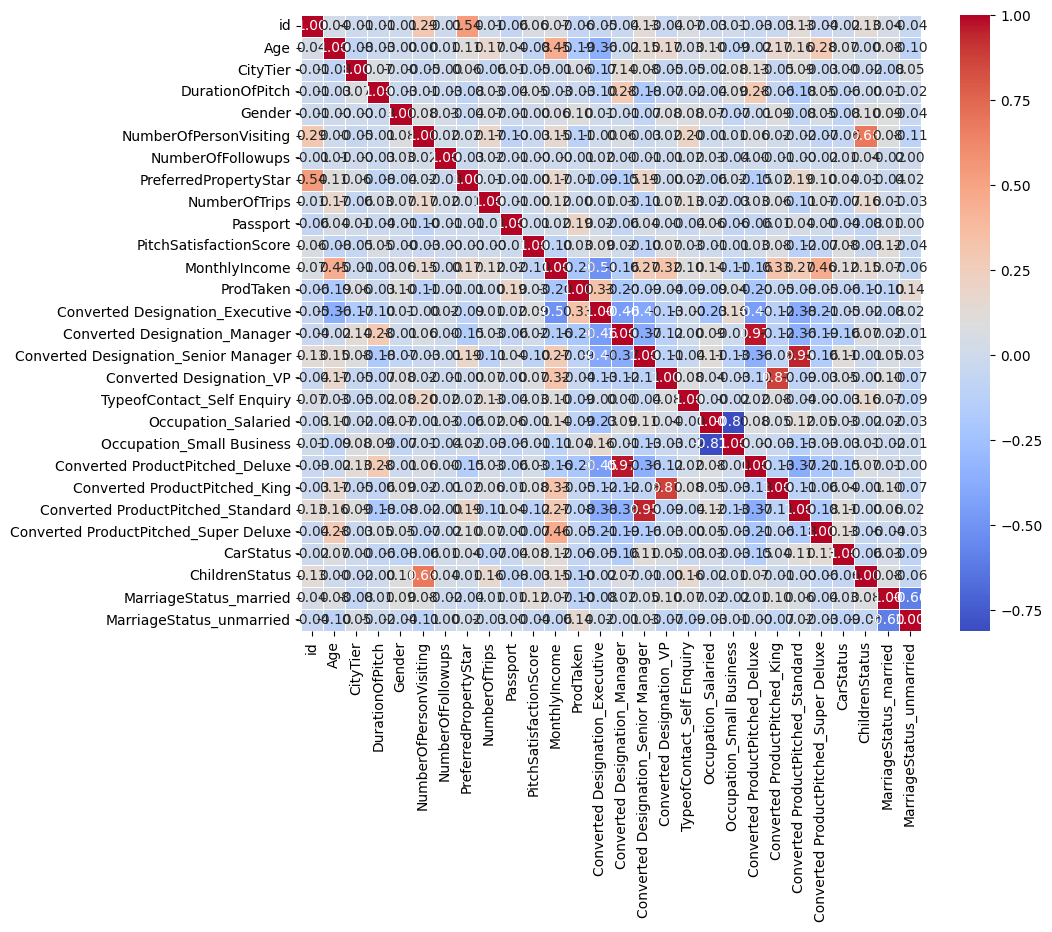

In [ ]:
# „Å®„Çä„ÅÇ„Åà„ÅöÁõ∏Èñ¢Èñ¢‰øÇ„ÇíË¶ã„Çã

correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [ ]:
correlated_pairs = []

# Ë°åÂàó„ÅÆ„Åô„Åπ„Å¶„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Çí„ÉÅ„Çß„ÉÉ„ÇØ
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.4:  # Áµ∂ÂØæÂÄ§„Åå0.4‰ª•‰∏ä„ÅÆÁµÑ„ÇíÈÅ∏Êäû
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# ÁµêÊûú„Çí„Éá„Éº„Çø„Éï„É¨„Éº„É†„Å´Â§âÊèõ
correlated_df = pd.DataFrame(correlated_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
correlated_df

Column 1  \
0                   PreferredPropertyStar   
1                           MonthlyIncome   
2         Converted Designation_Executive   
3           Converted Designation_Manager   
4               Occupation_Small Business   
5         Converted ProductPitched_Deluxe   
6         Converted ProductPitched_Deluxe   
7           Converted ProductPitched_King   
8       Converted ProductPitched_Standard   
9   Converted ProductPitched_Super Deluxe   
10                         ChildrenStatus   
11               MarriageStatus_unmarried   

                                Column 2  Correlation  
0                                     id     0.535946  
1                                    Age     0.451561  
2                          MonthlyIncome    -0.510171  
3        Converted Designation_Executive    -0.461636  
4                    Occupation_Salaried    -0.810956  
5        Converted Designation_Executive    -0.451846  
6          Converted Designation_Manager     0.967326  
7               Converted Designation_VP     0.869250  
8   Converted Designation_Senior Manager     0.946281  
9                          MonthlyIncome     0.460714  
10                NumberOfPersonVisiting     0.683772  
11                MarriageStatus_married    -0.597197

# ‰∫àÊ∏¨

## Ê±∫ÂÆöÊú®  
‚Äªturorial„Å®Âêå„Åò„Ç≥„Éº„Éâ„ÅßÂÆüË£Ö

In [ ]:
df_train.isnull().sum()

id                                         0
Age                                      100
CityTier                                   0
DurationOfPitch                          121
Gender                                     0
NumberOfPersonVisiting                     0
NumberOfFollowups                         33
PreferredPropertyStar                      0
NumberOfTrips                             22
Passport                                   0
PitchSatisfactionScore                     0
MonthlyIncome                             56
ProdTaken                                  0
Converted Designation_Executive            0
Converted Designation_Manager              0
Converted Designation_Senior Manager       0
Converted Designation_VP                   0
TypeofContact_Self Enquiry                 0
Occupation_Salaried                        0
Occupation_Small Business                  0
Converted ProductPitched_Deluxe            0
Converted ProductPitched_King              0
Converted ProductPitched_Standard          0
Converted ProductPitched_Super Deluxe      0
CarStatus                                  0
ChildrenStatus                             0
MarriageStatus_married                     0
MarriageStatus_unmarried                   0
dtype: int64

In [ ]:
# Ê¨†ÊêçÂÄ§„ÇíÂπ≥Âùá„ÅßË£úÂÆå
mean_values = df_train.mean()
df_train_filled = df_train.fillna(mean_values)
df_train_filled.isnull().sum()

id                                       0
Age                                      0
CityTier                                 0
DurationOfPitch                          0
Gender                                   0
NumberOfPersonVisiting                   0
NumberOfFollowups                        0
PreferredPropertyStar                    0
NumberOfTrips                            0
Passport                                 0
PitchSatisfactionScore                   0
MonthlyIncome                            0
ProdTaken                                0
Converted Designation_Executive          0
Converted Designation_Manager            0
Converted Designation_Senior Manager     0
Converted Designation_VP                 0
TypeofContact_Self Enquiry               0
Occupation_Salaried                      0
Occupation_Small Business                0
Converted ProductPitched_Deluxe          0
Converted ProductPitched_King            0
Converted ProductPitched_Standard        0
Converted ProductPitched_Super Deluxe    0
CarStatus                                0
ChildrenStatus                           0
MarriageStatus_married                   0
MarriageStatus_unmarried                 0
dtype: int64

In [ ]:
y_filled = df_train_filled["ProdTaken"]
X_filled = df_train_filled.drop(columns =['id','ChildrenStatus','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','Occupation_Small Business','PitchSatisfactionScore','ProdTaken'], axis = 1)
X_filled.head()

Age  CityTier  DurationOfPitch  Gender  NumberOfTrips  Passport  \
0  50.000000         2             15.0       1            5.0         1   
1  56.000000         1             14.0       1            2.0         1   
2  38.889938         1             10.0       0            4.0         0   
3  37.000000         2             18.0       0            1.0         0   
4  48.000000         3             17.0       0            4.0         0   

   MonthlyIncome  Converted Designation_Executive  \
0       253905.0                                1   
1       404475.0                                0   
2       278145.0                                1   
3       326805.0                                0   
4       258435.0                                1   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

   Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                         0                           1                    0   
1                         0                           0                    1   
2                         0                           1                    0   
3                         0                           1                    0   
4                         0                           0                    0   

   Converted ProductPitched_Deluxe  Converted ProductPitched_King  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Converted ProductPitched_Standard  Converted ProductPitched_Super Deluxe  \
0                                  0                                      0   
1                                  1                                      0   
2                                  0                                      0   
3                                  1                                      0   
4                                  0                                      0   

   CarStatus  MarriageStatus_married  MarriageStatus_unmarried  
0          0                       0                         1  
1          1                       0                         0  
2          0                       1                         0  
3          1                       0                         0  
4          1                       0                         1

In [ ]:
# „Éá„Éº„Çø„ÇíÂàÜÂâ≤
from sklearn.model_selection import train_test_split
X_train_filled, X_valid_filled, y_train_filled, y_valid_filled = train_test_split(X_filled, y_filled, random_state = 42)
print(X_train_filled.shape, X_valid_filled.shape, y_train_filled.shape, y_valid_filled.shape)

(2616, 20) (873, 20) (2616,) (873,)


In [ ]:
# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„Å®AUCË©ï‰æ°ÊåáÊ®ô„Çí„Ç§„É≥„Éù„Éº„Éà„Åó„Åæ„Åô„ÄÇ
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÇíÂëº„Å≥Âá∫„Åó„Åæ„Åô„ÄÇ„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅØÂÆüË°å„Åô„Çã„Åü„Å≥„Å´Â≠¶ÁøíÁµêÊûú„ÅåÂ§â„Çè„Çã„Åì„Å®„Åå„ÅÇ„Çã„ÅÆ„Åßrandom_state„Å´Êï∞Â≠ó„ÇíÊåáÂÆö„Åó„Å¶ÁµêÊûú„ÇíÂõ∫ÂÆö„Åó„Åæ„Åô„ÄÇ
rf_model = RandomForestClassifier(random_state=42)
# model.fit() „ÅßÂ≠¶Áøí„Åó„Åæ„Åô„ÄÇË®ìÁ∑¥„Éá„Éº„Çø„Å®Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆÁõÆÁöÑÂ§âÊï∞„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇ
rf_model.fit(X_train_filled, y_train_filled)

RandomForestClassifier(random_state=42)

In [ ]:
# predict_proba() „Åß‰∫àÊ∏¨
pred = rf_model.predict_proba(X_valid_filled)
score = roc_auc_score(y_valid_filled, pred[:, 1])
print(score)

0.8352452576046694


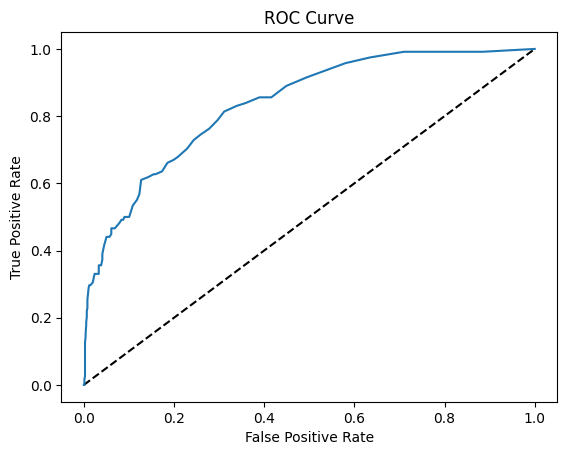

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid_filled, pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# KÂàÜÂâ≤‰∫§Â∑ÆÊ§úË®º
from sklearn.model_selection import StratifiedKFold, cross_val_score
stratifiedkfold = StratifiedKFold(n_splits=10)  #K=10ÂàÜÂâ≤
scores = cross_val_score(rf_model, X_filled, y_filled, cv=stratifiedkfold, scoring='roc_auc')
print('Cross-Validation scores: {}'.format(scores))   # ÂêÑÂàÜÂâ≤„Å´„Åä„Åë„Çã„Çπ„Ç≥„Ç¢
print('Average score: {}'.format(np.mean(scores)))  # „Çπ„Ç≥„Ç¢„ÅÆÂπ≥ÂùáÂÄ§

Cross-Validation scores: [0.86712375 0.86113712 0.8306689  0.84474916 0.87197324 0.79541806
 0.82220736 0.75846939 0.72098639 0.74104157]
Average score: 0.8113774941414691


## LightGBM
- Ê¨†ÊêçÂÄ§„Å´„Å§„ÅÑ„Å¶
  - ÂèÇËÄÉÊñáÁåÆ(https://nigimitama.hatenablog.jp/entry/2020/09/28/000000) „Çà„Çä„ÄÅ„ÇÄ„Åó„Çç„Åù„ÅÆ„Åæ„Åæ„ÅÆÊñπ„ÅåÁ≤æÂ∫¶„ÅåÈ´ò„ÅÑÂèØËÉΩÊÄß
- „É¢„Éá„É´ÊßãÁØâ„Å´„Å§„ÅÑ„Å¶
  - ÂèÇËÄÉÊñáÁåÆ
    - https://qiita.com/c60evaporator/items/351188110f328ff921b9 Ôºà„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞„Å´Èñ¢„Åó„Å¶Ôºâ
    - https://qiita.com/d_desuyon/items/807e01311ad08570ee78 ÔºàÔºíÂÄ§ÂàÜÈ°û„Å´Èñ¢„Åó„Å¶Ôºâ

In [ ]:
y = df_train["ProdTaken"]
X = df_train.drop(columns =['id','ChildrenStatus','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','Occupation_Small Business','PitchSatisfactionScore','ProdTaken'], axis = 1)
X.head()

Age  CityTier  DurationOfPitch  Gender  NumberOfTrips  Passport  \
0  50.0         2             15.0       1            5.0         1   
1  56.0         1             14.0       1            2.0         1   
2   NaN         1             10.0       0            4.0         0   
3  37.0         2             18.0       0            1.0         0   
4  48.0         3             17.0       0            4.0         0   

   MonthlyIncome  Converted Designation_Executive  \
0       253905.0                                1   
1       404475.0                                0   
2       278145.0                                1   
3       326805.0                                0   
4       258435.0                                1   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

   Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                         0                           1                    0   
1                         0                           0                    1   
2                         0                           1                    0   
3                         0                           1                    0   
4                         0                           0                    0   

   Converted ProductPitched_Deluxe  Converted ProductPitched_King  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Converted ProductPitched_Standard  Converted ProductPitched_Super Deluxe  \
0                                  0                                      0   
1                                  1                                      0   
2                                  0                                      0   
3                                  1                                      0   
4                                  0                                      0   

   CarStatus  MarriageStatus_married  MarriageStatus_unmarried  
0          0                       0                         1  
1          1                       0                         0  
2          0                       1                         0  
3          1                       0                         0  
4          1                       0                         1

In [ ]:
# cvÔºà„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Áî®Ôºâ„Å®evalÔºàearly_stoppingË©ï‰æ°Áî®Ôºâ„Å´ÂàÜÂâ≤
X_cv, X_eval, y_cv, y_eval = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier # Scikit-learn API
from sklearn.model_selection import KFold

In [ ]:
# „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞Ââç„ÅÆ„É¢„Éá„É´ÊßãÁØâ
# ‰ΩøÁî®„Åô„Çã„ÉÅ„É•„Éº„Éã„É≥„Ç∞ÂØæË±°Â§ñ„ÅÆ„Éë„É©„É°„Éº„Çø
params = {
    'objective': 'binary',  # ÔºíÂÄ§ÂàÜÈ°û
    'metric': 'auc',  # Â≠¶ÁøíÊôÇ„Å´‰ΩøÁî®„Åô„ÇãË©ï‰æ°ÊåáÊ®ô(early_stopping„ÅÆË©ï‰æ°ÊåáÊ®ô„Å´„ÇÇÂêå„ÅòÂÄ§„Åå‰ΩøÁî®„Åï„Çå„Çã)
    'random_state': 42,  # ‰π±Êï∞„Ç∑„Éº„Éâ
    'boosting_type': 'gbdt',
    'n_estimators': 10000,  # ÊúÄÂ§ßÂ≠¶Áøí„Çµ„Ç§„ÇØ„É´Êï∞„ÄÇearly_stopping‰ΩøÁî®ÊôÇ„ÅØÂ§ß„Åç„Å™ÂÄ§„ÇíÂÖ•Âäõ
    'verbose': -1,  # „Åì„Çå„ÇíÊåáÂÆö„Åó„Å™„ÅÑ„Å®`No further splits with positive gain, best gain: -inf`„Å®„ÅÑ„ÅÜWarning„ÅåË°®Á§∫„Åï„Çå„Çã
    'early_stopping_round': 10  # „Åì„Åì„Åßearly_stopping„ÇíÊåáÂÆö
    }
# „É¢„Éá„É´‰ΩúÊàê
lgbm_model = LGBMClassifier(**params)
# Â≠¶ÁøíÊôÇfit„Éë„É©„É°„Éº„ÇøÊåáÂÆö
fit_params = {
    'eval_set': [(X_eval, y_eval)]  # early_stoppingÁî®„ÅÆ„Éá„Éº„Çøeval_set„ÇíÊ∏°„Åô
    }


In [ ]:
scoring = 'roc_auc'  # Ë©ï‰æ°ÊåáÊ®ô„ÇíAUC„Å´ÊåáÂÆö
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßË©ï‰æ°ÊåáÊ®ôÁÆóÂá∫
scores = cross_val_score(lgbm_model, X_cv, y_cv, cv=cv,
                         scoring=scoring, n_jobs=-1, fit_params=fit_params)
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

scores=[0.79454006 0.80455964 0.77762569 0.82200047 0.80641369]
average_score=0.8010279103274126


In [ ]:
# from sklearn.model_selection import validation_curve
# import matplotlib.pyplot as plt
# cv_params = {'reg_alpha': [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
#              'reg_lambda': [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
#              'num_leaves': [2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256],
#              'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#              'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#              'subsample_freq': [0, 1, 2, 3, 4, 5, 6, 7],
#              'min_child_samples': [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#              }
# param_scales = {'reg_alpha': 'log',
#                 'reg_lambda': 'log',
#                 'num_leaves': 'linear',
#                 'colsample_bytree': 'linear',
#                 'subsample': 'linear',
#                 'subsample_freq': 'linear',
#                 'min_child_samples': 'linear'
#                 }
# # Ê§úË®ºÊõ≤Á∑ö„ÅÆ„Éó„É≠„ÉÉ„ÉàÔºà„Éë„É©„É°„Éº„ÇøÊØé„Å´„Éó„É≠„ÉÉ„ÉàÔºâ
# for i, (k, v) in enumerate(cv_params.items()):
#     train_scores, valid_scores = validation_curve(estimator=lgbm_model,
#                                                   X=X_cv, y=y_cv,
#                                                   param_name=k,
#                                                   param_range=v,
#                                                   fit_params=fit_params,
#                                                   cv=cv, scoring=scoring,
#                                                   n_jobs=-1)
#     # Â≠¶Áøí„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã„Çπ„Ç≥„Ç¢„ÅÆÂπ≥Âùá¬±Ê®ôÊ∫ñÂÅèÂ∑Æ„ÇíÁÆóÂá∫
#     train_mean = np.mean(train_scores, axis=1)
#     train_std  = np.std(train_scores, axis=1)
#     train_center = train_mean
#     train_high = train_mean + train_std
#     train_low = train_mean - train_std
#     # „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã„Çπ„Ç≥„Ç¢„ÅÆÂπ≥Âùá¬±Ê®ôÊ∫ñÂÅèÂ∑Æ„ÇíÁÆóÂá∫
#     valid_mean = np.mean(valid_scores, axis=1)
#     valid_std  = np.std(valid_scores, axis=1)
#     valid_center = valid_mean
#     valid_high = valid_mean + valid_std
#     valid_low = valid_mean - valid_std
#     # training_scores„Çí„Éó„É≠„ÉÉ„Éà
#     plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
#     plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
#     # validation_scores„Çí„Éó„É≠„ÉÉ„Éà
#     plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
#     plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
#     # „Çπ„Ç±„Éº„É´„Çíparam_scales„Å´Âêà„Çè„Åõ„Å¶Â§âÊõ¥
#     plt.xscale(param_scales[k])
#     # Ëª∏„É©„Éô„É´„Åä„Çà„Å≥Âá°‰æã„ÅÆÊåáÂÆö
#     plt.xlabel(k)  # „Éë„É©„É°„Éº„ÇøÂêç„ÇíÊ®™Ëª∏„É©„Éô„É´„Å´
#     plt.ylabel(scoring)  # „Çπ„Ç≥„Ç¢Âêç„ÇíÁ∏¶Ëª∏„É©„Éô„É´„Å´
#     plt.legend(loc='lower right')  # Âá°‰æã
#     # „Ç∞„É©„Éï„ÇíÊèèÁîª
#     plt.show()


In [ ]:
# from sklearn.model_selection import validation_curve
# import matplotlib.pyplot as plt
# lgbm_model.set_params(num_leaves=32)
# # Ê§úË®ºÊõ≤Á∑ö„ÅÆ„Éó„É≠„ÉÉ„ÉàÔºà„Éë„É©„É°„Éº„ÇøÊØé„Å´„Éó„É≠„ÉÉ„ÉàÔºâ
# for i, (k, v) in enumerate(cv_params.items()):
#     train_scores, valid_scores = validation_curve(estimator=lgbm_model,
#                                                   X=X, y=y,
#                                                   param_name=k,
#                                                   param_range=v,
#                                                   fit_params=fit_params,
#                                                   cv=cv, scoring=scoring,
#                                                   n_jobs=-1)
#     # Â≠¶Áøí„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã„Çπ„Ç≥„Ç¢„ÅÆÂπ≥Âùá¬±Ê®ôÊ∫ñÂÅèÂ∑Æ„ÇíÁÆóÂá∫
#     train_mean = np.mean(train_scores, axis=1)
#     train_std  = np.std(train_scores, axis=1)
#     train_center = train_mean
#     train_high = train_mean + train_std
#     train_low = train_mean - train_std
#     # „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã„Çπ„Ç≥„Ç¢„ÅÆÂπ≥Âùá¬±Ê®ôÊ∫ñÂÅèÂ∑Æ„ÇíÁÆóÂá∫
#     valid_mean = np.mean(valid_scores, axis=1)
#     valid_std  = np.std(valid_scores, axis=1)
#     valid_center = valid_mean
#     valid_high = valid_mean + valid_std
#     valid_low = valid_mean - valid_std
#     # training_scores„Çí„Éó„É≠„ÉÉ„Éà
#     plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
#     plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
#     # validation_scores„Çí„Éó„É≠„ÉÉ„Éà
#     plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
#     plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
#     # „Çπ„Ç±„Éº„É´„Çí'log'„Å´ÔºàÁ∑öÂΩ¢„Å™„Éë„É©„É°„Éº„Çø„ÅØ'linear'„Å´„Åô„Çã„ÅÆ„ÅßÊ≥®ÊÑèÔºâ
#     plt.xscale(param_scales[k])
#     # Ëª∏„É©„Éô„É´„Åä„Çà„Å≥Âá°‰æã„ÅÆÊåáÂÆö
#     plt.xlabel(k)  # „Éë„É©„É°„Éº„ÇøÂêç„ÇíÊ®™Ëª∏„É©„Éô„É´„Å´
#     plt.ylabel(scoring)  # „Çπ„Ç≥„Ç¢Âêç„ÇíÁ∏¶Ëª∏„É©„Éô„É´„Å´
#     plt.legend(loc='lower right')  # Âá°‰æã
#     # „Ç∞„É©„Éï„ÇíÊèèÁîª
#     plt.show()


In [ ]:
# Optuna„Å´„Çà„Çã„Éô„Ç§„Ç∫ÊúÄÈÅ©Âåñ„ÇíÁî®„ÅÑ„Åü„Éë„É©„É°„Éº„ÇøÈÅ∏Êäû
!pip install optuna
import optuna

# „Éô„Ç§„Ç∫ÊúÄÈÅ©ÂåñÊôÇ„ÅÆË©ï‰æ°ÊåáÊ®ôÁÆóÂá∫„É°„ÇΩ„ÉÉ„Éâ
def bayes_objective(trial):
    params = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0001, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0001, 10, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 128),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 0, 100)
    }
    # „É¢„Éá„É´„Å´„Éë„É©„É°„Éº„ÇøÈÅ©Áî®
    lgbm_model.set_params(**params)
    # cross_val_score„Åß„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥
    scores = cross_val_score(lgbm_model, X, y, cv=cv,
                             scoring=scoring, fit_params=fit_params, n_jobs=-1)
    val = scores.mean()
    return val

# „Éô„Ç§„Ç∫ÊúÄÈÅ©Âåñ„ÇíÂÆüË°å
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(bayes_objective, n_trials=400)

# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÅÆË°®Á§∫„Å®‰øùÊåÅ
best_params = study.best_trial.params
best_score = study.best_trial.value
print(f'ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø {best_params}\n„Çπ„Ç≥„Ç¢ {best_score}')


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 380.1/380.1 kB 11.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 233.0/233.0 kB 20.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.6/78.6 kB 4.6 MB/s eta 0:00:00


[I 2024-09-01 12:01:58,182] A new study created in memory with name: no-name-4c0318ff-ad36-44b8-9d2f-9f62ca12c077
[I 2024-09-01 12:01:59,507] Trial 0 finished with value: 0.8082281383581378 and parameters: {'reg_alpha': 0.0074593432857265485, 'reg_lambda': 5.669849511478847, 'num_leaves': 94, 'colsample_bytree': 0.759195090518222, 'subsample': 0.4936111842654619, 'subsample_freq': 1, 'min_child_samples': 5}. Best is trial 0 with value: 0.8082281383581378.
[I 2024-09-01 12:02:00,190] Trial 1 finished with value: 0.8127098898939649 and parameters: {'reg_alpha': 2.1423021757741068, 'reg_lambda': 0.10129197956845731, 'num_leaves': 91, 'colsample_bytree': 0.41235069657748147, 'subsample': 0.9819459112971965, 'subsample_freq': 6, 'min_child_samples': 21}. Best is trial 1 with value: 0.8127098898939649.
[I 2024-09-01 12:02:00,755] Trial 2 finished with value: 0.8043941562457931 and parameters: {'reg_alpha': 0.0008111941985431928, 'reg_lambda': 0.0008260808399079611, 'num_leaves': 40, 'colsamp

ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø {'reg_alpha': 5.39506229447308, 'reg_lambda': 0.013000766295691529, 'num_leaves': 55, 'colsample_bytree': 0.45981146221094826, 'subsample': 0.4410953537517899, 'subsample_freq': 3, 'min_child_samples': 70}
„Çπ„Ç≥„Ç¢ 0.8402208947448477


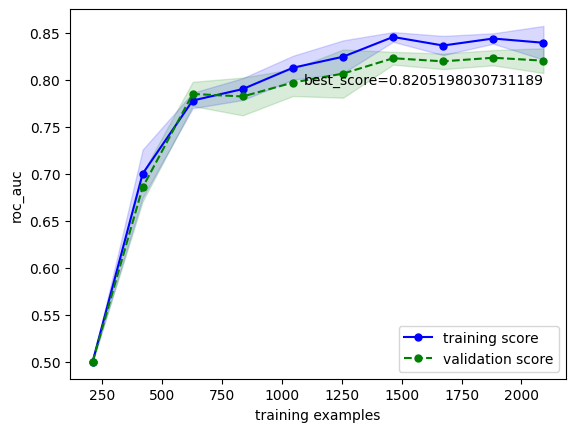

In [ ]:
# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„Å´„Åä„Åë„ÇãÈÅéÂ≠¶Áøí„ÅÆÁ¢∫Ë™ç

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÇíÂ≠¶ÁøíÂô®„Å´„Çª„ÉÉ„Éà
lgbm_model.set_params(**best_params)

# Â≠¶ÁøíÊõ≤Á∑ö„ÅÆÂèñÂæó
train_sizes, train_scores, valid_scores = learning_curve(estimator=lgbm_model,
                                                         X=X_cv, y=y_cv,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         fit_params=fit_params,
                                                         cv=cv, scoring=scoring, n_jobs=-1)
# Â≠¶Áøí„Éá„Éº„ÇøÊåáÊ®ô„ÅÆÂπ≥Âùá¬±Ê®ôÊ∫ñÂÅèÂ∑Æ„ÇíË®àÁÆó
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std
# Ê§úË®º„Éá„Éº„ÇøÊåáÊ®ô„ÅÆÂπ≥Âùá¬±Ê®ôÊ∫ñÂÅèÂ∑Æ„ÇíË®àÁÆó
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std
# training_scores„Çí„Éó„É≠„ÉÉ„Éà
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scores„Çí„Éó„É≠„ÉÉ„Éà
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')
# ÊúÄÈ´ò„Çπ„Ç≥„Ç¢„ÅÆË°®Á§∫
best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
# Ëª∏„É©„Éô„É´„Åä„Çà„Å≥Âá°‰æã„ÅÆÊåáÂÆö
plt.xlabel('training examples')  # Â≠¶Áøí„Çµ„É≥„Éó„É´Êï∞„ÇíÊ®™Ëª∏„É©„Éô„É´„Å´
plt.ylabel(scoring)  # „Çπ„Ç≥„Ç¢Âêç„ÇíÁ∏¶Ëª∏„É©„Éô„É´„Å´
plt.legend(loc='lower right')  # Âá°‰æã


In [ ]:
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßË©ï‰æ°ÊåáÊ®ôÁÆóÂá∫
scores = cross_val_score(lgbm_model, X_cv, y_cv, cv=cv,
                         scoring=scoring, n_jobs=-1, fit_params=fit_params)
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

scores=[0.80410009 0.82900624 0.80678206 0.83642411 0.83520833]
average_score=0.8223041675076954


In [ ]:
from sklearn.model_selection import train_test_split

# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Çí„Éà„É¨„Éº„Éã„É≥„Ç∞Áî®„Å®Ê§úË®ºÁî®„Å´ÂàÜÂâ≤
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# „É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞Ôºàearly stopping „ÅÆË®≠ÂÆöÔºâ
lgbm_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],  # Ê§úË®ºÁî®„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÊåáÂÆö
    eval_metric='roc_auc',      # Ë©ï‰æ°ÊåáÊ®ô„ÇíÊåáÂÆöÔºà„Åì„Åì„Åß„ÅØ logloss „Çí‰ΩøÁî®Ôºâ
)


LGBMClassifier(colsample_bytree=0.45981146221094826, early_stopping_round=10,
               metric='auc', min_child_samples=70, n_estimators=10000,
               num_leaves=55, objective='binary', random_state=42,
               reg_alpha=5.39506229447308, reg_lambda=0.013000766295691529,
               subsample=0.4410953537517899, subsample_freq=3, verbose=-1)

[[-0.11850014  0.24919157 -0.01701499 ...  0.06155866  0.03621089
   0.30486712]
 [-0.0645915  -0.27423596 -0.01616498 ... -0.04219285  0.0122986
  -0.06823663]
 [ 0.52647567 -0.28137702 -0.0132647  ...  0.07222089 -0.03657801
  -0.17283513]
 ...
 [-0.00188428 -0.26545968 -0.03841646 ... -0.06565577  0.01469686
   0.15857419]
 [-0.0584986   0.13037139 -0.04276791 ...  0.03869051 -0.01891028
  -0.08933903]
 [-0.19555636 -0.28958107 -0.08924309 ...  0.06709882 -0.07046025
  -0.18538436]]        Age  CityTier  DurationOfPitch  Gender  NumberOfTrips  Passport  \
0     50.0         2             15.0       1            5.0         1   
1     56.0         1             14.0       1            2.0         1   
2      NaN         1             10.0       0            4.0         0   
3     37.0         2             18.0       0            1.0         0   
4     48.0         3             17.0       0            4.0         0   
...    ...       ...              ...     ...            ...     

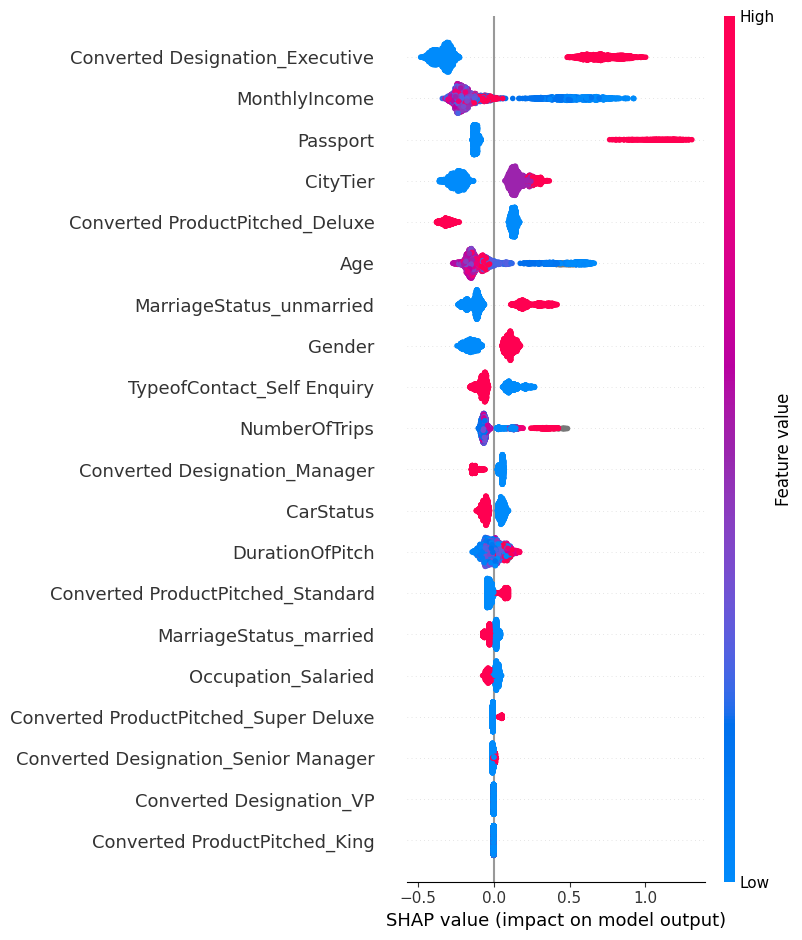

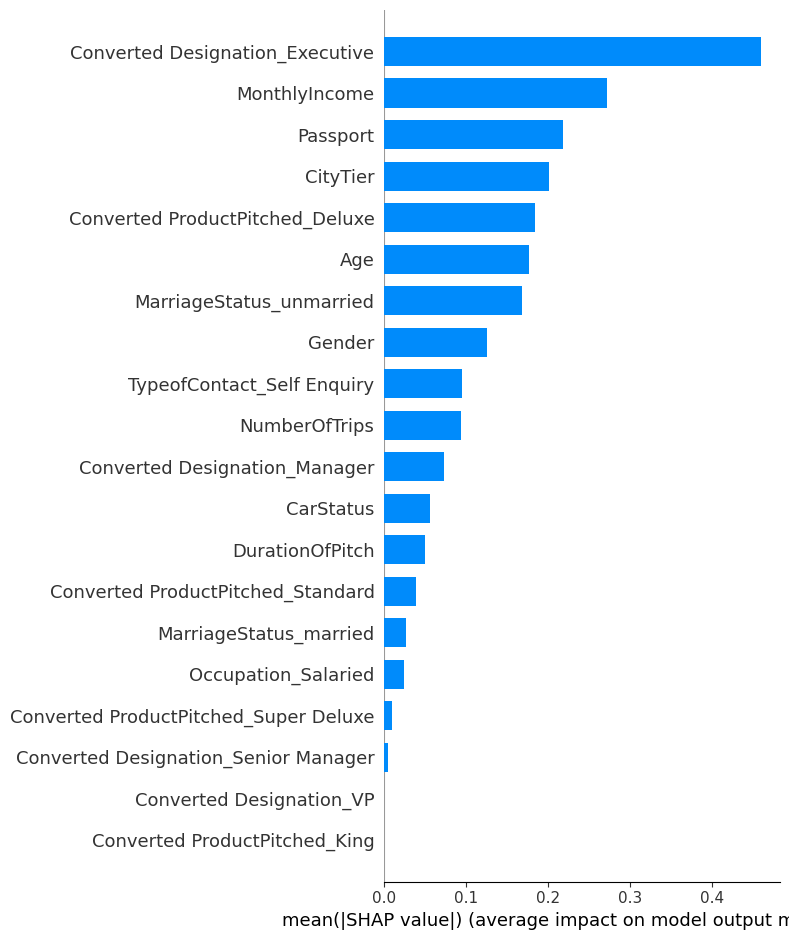

In [ ]:
# SHAP„ÅßÁâπÂæ¥Èáè„ÅÆË≤¢ÁåÆÂ∫¶„ÇíÊääÊè°„Åô„Çã
!pip install shap
import shap
shap.initjs()

"""
shap.TreeExplainer:Ê±∫ÂÆöÊú®Áî®(XGBoost„ÄÅlightBGMÁ≠âÂê´„ÇÄ)
shap.LinearExplainer :Á∑öÂΩ¢„É¢„Éá„É´Áî®
shap.DeepExplainer :DeeplearningÁî®
"""
#TreeExplainer„ÅØ„ÄÅÊ±∫ÂÆöÊú®Á≥ª„ÅÆ„É¢„Éá„É´„ÅÆSHAPÂÄ§„ÇíÂèñÂæó„Åô„Çã„ÇÇ„ÅÆ„ÄÇ
# lgbm_model.fit(X, y, fit_params=fit_params)
explainer = shap.TreeExplainer(model=lgbm_model)
shap_values = explainer.shap_values(X=X)
print(shap_values, X)
shap.summary_plot(shap_values, X) #Â∑¶ÂÅ¥„ÅÆÂõ≥
shap.summary_plot(shap_values, X, plot_type='bar') #Âè≥ÂÅ¥„ÅÆÂõ≥

# ÊèêÂá∫

In [ ]:
# ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´
test = df_test.drop(columns =['id','ChildrenStatus','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','Occupation_Small Business','PitchSatisfactionScore'], axis = 1)
test.head()

Age  CityTier  DurationOfPitch  Gender  NumberOfTrips  Passport  \
0  48.0         2             13.0       1            7.0         0   
1  30.0         2             12.0       0            4.0         1   
2  25.0         1              9.0       0            1.0         0   
3  21.0         2              7.0       1            1.0         0   
4  41.0         1              7.0       1            1.0         0   

   MonthlyIncome  Converted Designation_Executive  \
0       496950.0                                0   
1       300000.0                                0   
2       260000.0                                1   
3       259875.0                                0   
4       268830.0                                1   

   Converted Designation_Manager  Converted Designation_Senior Manager  \
0                              0                                     0   
1                              0                                     1   
2                              0                                     0   
3                              0                                     1   
4                              0                                     0   

   Converted Designation_VP  TypeofContact_Self Enquiry  Occupation_Salaried  \
0                         0                           1                    0   
1                         0                           1                    0   
2                         0                           1                    1   
3                         0                           0                    1   
4                         0                           0                    1   

   Converted ProductPitched_Deluxe  Converted ProductPitched_King  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Converted ProductPitched_Standard  Converted ProductPitched_Super Deluxe  \
0                                  0                                      1   
1                                  1                                      0   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   

   CarStatus  MarriageStatus_married  MarriageStatus_unmarried  
0          1                       1                         0  
1          0                       1                         0  
2          0                       0                         0  
3          1                       0                         0  
4          1                       0                         1

In [ ]:
predict = lgbm_model.predict_proba(test)
print(predict[:5])

[[0.91583811 0.08416189]
 [0.69540542 0.30459458]
 [0.77049613 0.22950387]
 [0.70597699 0.29402301]
 [0.74282512 0.25717488]]


In [ ]:
# submit_sample.csv„ÇíË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ
sample_sub.head()

0         1
0  3489  0.084162
1  3490  0.304595
2  3491  0.229504
3  3492  0.294023
4  3493  0.257175

In [ ]:
# ÊèêÂá∫„Éï„Ç°„Ç§„É´„ÅÆ2ÂàóÁõÆ„Çí‰∫àÊ∏¨ÂÄ§„ÅßÁΩÆ„ÅçÊèõ„Åà„Åæ„Åô„ÄÇ
sample_sub[1] = predict[:, 1]
sample_sub.head()

0         1
0  3489  0.084162
1  3490  0.304595
2  3491  0.229504
3  3492  0.294023
4  3493  0.257175

In [ ]:
sample_sub.to_csv("submission_240901_03.csv", index=False, header=None)
from google.colab import files
files.download('submission_240901_03.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>